<a href="https://colab.research.google.com/github/BalytskyiJaroslaw/PathogensRamanOpenSet/blob/main/Obj_K_p1_p2_I_p3_submit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operating in the ***open*** world, Objectosphere, $\mathcal{K} = p_1 + p_2$, $\mathcal{I} = p_3$

In [ ]:
from __future__ import absolute_import
from __future__ import print_function

import numpy as np
from numpy import genfromtxt
from sklearn.utils import shuffle


import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from pandas import read_csv

from keras.layers import Lambda, Multiply

import csv
import pprint

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

import keras
#from keras.utils import to_categorical
from pandas import read_csv
from keras.models import Sequential
from keras import layers
#from keras.optimizers import SGD
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
#from keras.optimizers import SGD

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint

from sklearn.preprocessing import LabelEncoder
import gspread
import pandas as pd
import pickle
import pywt
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
#from keras.utils import to_categorical

from time import time
t00 = time()
import os
from tensorflow.keras import layers
from keras.layers import Input, Dense, concatenate
from keras.models import Model
from keras.layers import GlobalAveragePooling1D

In [ ]:
# Initialize the TPU and spread the computations across the 8 cores
import tensorflow as tf
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
tf.config.list_logical_devices('TPU')
#print("All devices: ", tf.config.list_logical_devices('TPU'))

strategy = tf.distribute.TPUStrategy(resolver)

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Reference dataset

In [ ]:
# Reference data
data_X_reference = np.load("/content/gdrive/MyDrive/Stanford_data/X_reference.npy")
# Test data
data_X_test = np.load("/content/gdrive/MyDrive/Stanford_data/X_test.npy")

data_y_reference = np.load("/content/gdrive/MyDrive/Stanford_data/y_reference.npy")
# Test labels
data_y_test = np.load("/content/gdrive/MyDrive/Stanford_data/y_test.npy")

data_y_reference_int = []

for i in range(data_y_reference.shape[0]):
  data_y_reference_int.append(int(data_y_reference[i]))

data_y_test_int = []

for i in range(data_y_test.shape[0]):
  data_y_test_int.append(int(data_y_test[i]))

train_label = tf.keras.utils.to_categorical(data_y_reference_int)
test_label = tf.keras.utils.to_categorical(data_y_test_int)

# $\mathcal{K} = p_1 + p_2$, reference indices, training dataset: 18000 - 26000, 28000 - 38000, 44000 - 50000, 52000 - 58000. $\mathcal{I} = p_3$, reference indices: 10000 - 14000, 26000 - 28000, 42000 - 44000, 58000 - 60000.

In [ ]:
indices =[slice(18000, 26000),slice(28000, 38000),slice(44000, 50000),slice(52000, 58000),slice(10000, 14000),slice(26000, 28000),slice(42000, 44000),slice(58000, 60000)]

Known_and_Ignored_data_X_reference = np.concatenate([data_X_reference[idx, :] for idx in indices], axis=0)

Known_and_Ignored_data_X_train_label_int = []

for i in range(2000*15):
  Known_and_Ignored_data_X_train_label_int.append(int(data_y_reference[i]))

for i in range(2000*5):
 Known_and_Ignored_data_X_train_label_int.append(int(data_y_reference[2000*15]))

Known_and_Ignored_data_X_train_label = tf.keras.utils.to_categorical(Known_and_Ignored_data_X_train_label_int)
print("Shape of the known and ignored data, reference:", Known_and_Ignored_data_X_reference.shape)
print("Shape of the known and ignored labels, reference:", Known_and_Ignored_data_X_train_label.shape)

Shape of the known and ignored data, reference: (40000, 1000)
Shape of the known and ignored labels, reference: (40000, 16)


# $\mathcal{K}$, known reference indices for the ***test***: 900 - 1300, 1400 - 1900, 2200 - 2500, 2800 - 2900. Ignored, ***test***: 500 - 700, 1300 - 1400, 2100 - 2200, 2900 - 3000.


In [ ]:
indices =[slice(900, 1300),slice(1400, 1900),slice(2200, 2500),slice(2600, 2900),slice(500, 700),slice(1300, 1400),slice(2100, 2200),slice(2900, 3000)]

Known_and_Ignored_data_X_test = np.concatenate([data_X_test[idx, :] for idx in indices], axis=0)

Known_and_Ignored_data_X_test_label_int = []

for i in range(100*15):
  Known_and_Ignored_data_X_test_label_int.append(int(data_y_test[i]))

for i in range(100*5):
  Known_and_Ignored_data_X_test_label_int.append(int(data_y_test[100*15]))

Known_and_Ignored_data_X_test_label = tf.keras.utils.to_categorical(Known_and_Ignored_data_X_test_label_int)
print("Shape of the known and ignored data, reference:", Known_and_Ignored_data_X_test.shape)
print("Shape of the known and ignored labels, reference:", Known_and_Ignored_data_X_test_label.shape)

Shape of the known and ignored data, reference: (2000, 1000)
Shape of the known and ignored labels, reference: (2000, 16)


# Leave only $\mathcal{K}$ samples to test the accuracy. This is done to keep the right shape of the labels.

In [ ]:
Known_data_X_test = Known_and_Ignored_data_X_test[:-100*5]
Known_data_X_test_label = Known_and_Ignored_data_X_test_label[:-100*5]
print("Shape of the known and ignored data, reference:", Known_data_X_test.shape)
print("Shape of the known and ignored labels, reference:", Known_data_X_test_label.shape)

Shape of the known and ignored data, reference: (1500, 1000)
Shape of the known and ignored labels, reference: (1500, 16)


# Defining the $\mathcal{K}$ labels

In [ ]:
KnownLabels = []
# 0 - 5
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 0*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 1*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 2*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 3*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 4*2000])

# 6 - 10
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 5*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 6*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 7*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 8*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 9*2000])

# 11 - 15
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 10*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 11*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 12*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 13*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 14*2000])

Ignored_label = Known_and_Ignored_data_X_train_label[1 + 15*2000]

In [ ]:
KnownLabels

[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 

# The ignored label $\mathcal{I}$ is:

In [ ]:
Ignored_label

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

# Never seen before samples, $\mathcal{N}$, first seen during the test: 0 - 500, 700 - 900, 1900 - 2100, 2500 - 2600.

In [ ]:
indices = [slice(0, 500),slice(700, 900),slice(1900, 2100),slice(2500, 2600)]
NeverSeen_data_X_test = np.concatenate([data_X_test[idx, :] for idx in indices], axis=0)

print("Shape of the NeverSeen data, test:", NeverSeen_data_X_test.shape)

Shape of the NeverSeen data, test: (1000, 1000)


# Data for finetuning

In [ ]:
# Finetuning
data_X_finetune = np.load("/content/gdrive/MyDrive/Stanford_data/X_finetune.npy")
# Test data
data_X_test = np.load("/content/gdrive/MyDrive/Stanford_data/X_test.npy")

data_y_finetune = np.load("/content/gdrive/MyDrive/Stanford_data/y_finetune.npy")
# Test labels
data_y_test = np.load("/content/gdrive/MyDrive/Stanford_data/y_test.npy")

data_y_finetune_int = []

for i in range(data_y_finetune.shape[0]):
  data_y_finetune_int.append(int(data_y_finetune[i]))

data_y_test_int = []

for i in range(data_y_test.shape[0]):
  data_y_test_int.append(int(data_y_test[i]))

train_label = tf.keras.utils.to_categorical(data_y_finetune_int)
test_label = tf.keras.utils.to_categorical(data_y_test_int)

#data_X_finetune, train_label = shuffle(data_X_finetune, train_label)

# Known data, $\mathcal{K}$, for the finetuning: 900 - 1300, 1700 - 1900, 2200 - 2500, 2800 - 2900. Ignored samples, $\mathcal{I}$, finetuning: 500 - 700, 1300 - 1400, 2100 - 2200, 2900 - 3000.

In [ ]:
indices =[slice(900, 1300),slice(1400, 1900),slice(2200, 2500),slice(2600, 2900),slice(500, 700),slice(1300, 1400),slice(2100, 2200),slice(2900, 3000)]

Known_and_Ignored_data_X_finetune = np.concatenate([data_X_finetune[idx, :] for idx in indices], axis=0)

Known_and_Ignored_data_X_finetune_label_int = []

for i in range(100*15):
  Known_and_Ignored_data_X_finetune_label_int.append(int(data_y_finetune[i]))

for i in range(100*5):
  Known_and_Ignored_data_X_finetune_label_int.append(int(data_y_finetune[100*15]))

Known_and_Ignored_data_X_finetune_label = tf.keras.utils.to_categorical(Known_and_Ignored_data_X_finetune_label_int)

print("Shape of the known and ignored data, finetune:", Known_and_Ignored_data_X_finetune.shape)
print("Shape of the known and ignored labels, finetune:", Known_and_Ignored_data_X_finetune_label.shape)

Shape of the known and ignored data, finetune: (2000, 1000)
Shape of the known and ignored labels, finetune: (2000, 16)


# Uploading the libraries

In [ ]:
# Create a checkpoint directory to store the checkpoints.
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

import numpy as np
import pandas as pd
import seaborn as sns
from numpy import interp
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, roc_curve, plot_roc_curve
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate, BatchNormalization, Activation, add
from keras.layers import Conv2D, MaxPooling2D, Reshape, Flatten, Dense, GlobalAveragePooling1D, GlobalMaxPooling1D, Multiply, Conv1DTranspose, LeakyReLU, Dropout
from keras.models import Model, model_from_json
#from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
sns.set_theme(style="whitegrid")

# Defining our model

In [ ]:
# Constants
NoF = 64  # Number of filters in the first convolutional layer
SE_RATIO = 16  # Squeeze-and-Excitation ratio

initializer = tf.keras.initializers.GlorotUniform(seed=0)
initializer2 = tf.keras.initializers.HeUniform(seed=0)

def squeeze_excitation_block(X, ratio=16):
    num_channels = X.shape[-1]
    se = tf.keras.layers.GlobalAveragePooling1D()(X)
    se = tf.keras.layers.Reshape((1, num_channels))(se)
    se = tf.keras.layers.Dense(num_channels // ratio, activation='relu', kernel_initializer=initializer)(se)
    se = tf.keras.layers.Dense(num_channels, activation='sigmoid', kernel_initializer=initializer)(se)
    return tf.keras.layers.Multiply()([X, se])


from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, Add
from tensorflow.keras import models, layers
from tensorflow.keras import regularizers

initializer = tf.keras.initializers.GlorotUniform(seed=0)
initializer2 = tf.keras.initializers.HeUniform(seed=0)
Stride=1

def identity_block(X, f, filters, stage, block):

  #defining name basis
  ConvNameBase = 'res' + str(stage) + block + '_branch'
  BatchNormBase = 'bn' + str(stage) + block + '_branch'

  #retrieve filters
  F1,F2,F3 = filters

  #save the input value. You'll need this later to add back the main path
  x_shortcut = X

  ### First component of the main path ###
  X = tf.keras.layers.Conv1D(filters=F1, kernel_size=1, strides=Stride, padding='same',
             kernel_initializer=initializer#, name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)
  X = tf.keras.layers.Activation('relu')(X)

  ### Second component of main path ###
  X = tf.keras.layers.Conv1D(filters=F2, kernel_size=f, strides=Stride, padding='same',
             kernel_initializer=initializer, #name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)
  X = tf.keras.layers.Activation('relu')(X)

  #Third Component of main path
  X = tf.keras.layers.Conv1D(filters=F3, kernel_size=1, strides=Stride, padding='same',
             kernel_initializer=initializer#,name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)

  #Final step: add shortcut to the main path, and pass it through ReLU activation
  X = tf.keras.layers.Add()([X, x_shortcut])
  X = tf.keras.layers.Activation('relu')(X)

  return X

def convolutional_block(X, f, filters, stage, block, s=2):

  #Defining name bases
  ConvNameBase = 'res' + str(stage) + block + '_branch'
  BatchNormBase = 'res' + str(stage) + block + '_branch'

  #retrive n_filters
  F1, F2, F3 = filters

  #Save the input value
  x_shortcut = X

  #First component of the main path
  X = tf.keras.layers.Conv1D(F1, strides=s, kernel_size=f, kernel_initializer=initializer,
             padding='same'#, name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)
  X = tf.keras.layers.Activation('relu')(X)

  #Second Component of main path
  X = tf.keras.layers.Conv1D(filters=F2, kernel_size=f, strides=Stride, padding='same',
             kernel_initializer=initializer#, name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)
  X = tf.keras.layers.Activation('relu')(X)

  #Third component of main path
  X = tf.keras.layers.Conv1D(filters=F3, kernel_size=f, strides=Stride, padding='same',
             kernel_initializer=initializer, name=ConvNameBase)(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
  )(X)

  ###### SHORTCUT PATH ######
  x_shortcut = tf.keras.layers.Conv1D(filters = F3, kernel_size=1, strides=s,
                      padding='same', #name=ConvNameBase,
                      kernel_initializer=initializer)(x_shortcut)
  x_shortcut = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                                  )(x_shortcut)

  #Add shortcut to main path and pass in through ReLU activation
  X = tf.keras.layers.Add()([X, x_shortcut])
  X = tf.keras.layers.Activation('relu')(X)

  return X

def create_model():
    input_shape = (1000, 1)
    nb_classes = 15 + 1

    x_input = tf.keras.layers.Input(input_shape)
    X = tf.keras.layers.ZeroPadding1D(padding=3)(x_input)

    X = tf.keras.layers.Conv1D(NoF, kernel_size=7, strides=2, name='Convolution1',
                               kernel_initializer=initializer)(X)
    X = tf.keras.layers.BatchNormalization(name="BatchNormStage1")(X)
    X = tf.keras.layers.Activation('relu')(X)
    X = tf.keras.layers.MaxPooling1D(3, strides=2)(X)

    X = convolutional_block(X, f=3, filters=[NoF, NoF, NoF * 4], stage=2, block='a', s=1)
    X = identity_block(X, 3, [NoF, NoF, NoF * 4], stage=2, block='b')

    X = convolutional_block(X, f=3, filters=[NoF * 2, NoF * 2, NoF * 8], stage=3, block='a')
    X = identity_block(X, 3, [NoF * 2, NoF * 2, NoF * 8], stage=3, block='b')

    X = convolutional_block(X, f=3, filters=[NoF * 4, NoF * 4, NoF * 16], stage=4, block='a')
    X = identity_block(X, 3, [NoF * 4, NoF * 4, NoF * 16], stage=4, block='b')

    X = convolutional_block(X, f=3, filters=[NoF * 4, NoF * 4, NoF * 32], stage=5, block='a')
    X = identity_block(X, f=3, filters=[NoF * 4, NoF * 4, NoF * 32], stage=5, block='b')

    # Applying SE mechanism before transposed convolutional layers
    X = squeeze_excitation_block(X)

    # Adding transposed convolutional layers
    X = Conv1DTranspose(filters=NoF, kernel_size=3, strides=2, padding='same', kernel_initializer=initializer)(X)
    X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,)(X)
    X = LeakyReLU(alpha=0.2)(X)

    X = Flatten()(X)

    # Adding dropout regularization
    X = Dropout(0.5)(X)

    F = tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),use_bias=None,activity_regularizer=regularizers.l2(1e-5))(X)

    Y = tf.keras.layers.Dense(nb_classes, activation='softmax',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5))(F)

    res_net = tf.keras.Model(inputs = x_input, outputs = [Y,F], name='Combined')

    return res_net

model = create_model()
model.summary()

Model: "Combined"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1000, 1)]            0         []                            
                                                                                                  
 zero_padding1d (ZeroPaddin  (None, 1006, 1)              0         ['input_1[0][0]']             
 g1D)                                                                                             
                                                                                                  
 Convolution1 (Conv1D)       (None, 500, 64)              512       ['zero_padding1d[0][0]']      
                                                                                                  
 BatchNormStage1 (BatchNorm  (None, 500, 64)              256       ['Convolution1[0][0]'] 

In [ ]:
with strategy.scope():

  # By N_classes, I mean classes of interest.
  N_classes = 15

  # Additional contribution

  def additional(target,output):

    Checker = tf.math.reduce_sum(tf.math.multiply(Ignored_label, target),axis=-1)
    Try = tf.math.square(output)
    Try = tf.math.reduce_sum(Try,axis=-1,keepdims=True)

    Try = tf.math.multiply(Checker,Try)

    return Try

  def Open_set_categorical_crossentropy_trial_total(target,output):
    def Open_set_categorical_crossentropy_trial_first(target,output):
      output = tf.convert_to_tensor(output)
      target = tf.cast(target, target.dtype)

      epsilon = tf.keras.backend.epsilon()
      output = tf.clip_by_value(output, epsilon, 1. - epsilon)

      Sum = tf.math.reduce_sum(output,axis=-1,keepdims=True)

      output = tf.math.divide(output, Sum)

      Checker = tf.math.reduce_sum(tf.math.multiply(Ignored_label, target),axis=-1)
      One = tf.math.reduce_sum(tf.math.multiply(Ignored_label, Ignored_label),axis=-1)

      output = - tf.math.reduce_sum(tf.math.multiply(target,tf.math.log(output)),axis=-1)
      output = tf.math.multiply(tf.math.subtract(One,Checker),output)

      return output

    def Open_set_categorical_crossentropy_trial_second(target,output):
      output = tf.convert_to_tensor(output)
      target = tf.cast(target, target.dtype)

      epsilon = tf.keras.backend.epsilon()
      output = tf.clip_by_value(output, epsilon, 1. - epsilon)

      Sum = tf.math.reduce_sum(output,axis=-1,keepdims=True)

      output = tf.math.divide(output, Sum)

      Checker = tf.math.reduce_sum(tf.math.multiply(Ignored_label, target),axis=-1)
      One = tf.math.reduce_sum(tf.math.multiply(Ignored_label, Ignored_label),axis=-1)
      Zero = tf.math.reduce_sum(tf.math.multiply(KnownLabels[1], KnownLabels[2]),axis=-1)

      for i in range(N_classes):
        addon = - tf.math.reduce_sum(tf.math.multiply(KnownLabels[i], tf.math.log(output)),axis=-1)
        addon = tf.math.divide(addon,N_classes)
        Zero = tf.math.add(addon,Zero)
      Zero = tf.math.multiply(Checker, Zero)

      return Zero

    output1 = Open_set_categorical_crossentropy_trial_first(target,output)
    output2 = Open_set_categorical_crossentropy_trial_second(target,output)
    output3 = Open_set_categorical_crossentropy_trial_second(target,output)

    output = tf.math.add(output1,output2)
    output = tf.math.add(output,output3)

    return output

  res_net = create_model()

  optimizer = tf.keras.optimizers.Adam(learning_rate=.00001)

  checkpoint = tf.train.Checkpoint(optimizer=optimizer, model=res_net)

  callbacks = [EarlyStopping(monitor='val_loss', patience=20, mode='min'), ModelCheckpoint('/content/gdrive/MyDrive/Stanford_data/01_Obj_K_p1_p2_I_p3_minus10.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='min')]
  res_net.compile(loss=[Open_set_categorical_crossentropy_trial_total, additional],loss_weights=[1., 0.0000000000000001/10],optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),metrics=None)

  Known_and_Ignored_data_X_reference, Known_and_Ignored_data_X_train_label = shuffle(Known_and_Ignored_data_X_reference,Known_and_Ignored_data_X_train_label)

  history = res_net.fit(Known_and_Ignored_data_X_reference, Known_and_Ignored_data_X_train_label, epochs=500, batch_size=32, verbose=1, validation_split=0.2, shuffle=True, callbacks=callbacks)


In [ ]:
res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/01_Obj_K_p1_p2_I_p3_minus10.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #1", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/02_Obj_K_p1_p2_I_p3_minus10.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #2", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/03_Obj_K_p1_p2_I_p3_minus10.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #3", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/04_Obj_K_p1_p2_I_p3_minus10.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #4", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/05_Obj_K_p1_p2_I_p3_minus10.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #5", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/06_Obj_K_p1_p2_I_p3_minus10.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #6", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/07_Obj_K_p1_p2_I_p3_minus10.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #7", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/08_Obj_K_p1_p2_I_p3_minus10.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #8", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/09_Obj_K_p1_p2_I_p3_minus10.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #9", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/10_Obj_K_p1_p2_I_p3_minus10.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #10", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/11_Obj_K_p1_p2_I_p3_minus10.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #11", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/12_Obj_K_p1_p2_I_p3_minus10.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #12", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/13_Obj_K_p1_p2_I_p3_minus10.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #13", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/14_Obj_K_p1_p2_I_p3_minus10.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #14", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/15_Obj_K_p1_p2_I_p3_minus10.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #15", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/16_Obj_K_p1_p2_I_p3_minus10.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #16", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/17_Obj_K_p1_p2_I_p3_minus10.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #17", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/18_Obj_K_p1_p2_I_p3_minus10.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #18", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/19_Obj_K_p1_p2_I_p3_minus10.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #19", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/20_Obj_K_p1_p2_I_p3_minus10.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #20", true/(Known_data_X_test_label.shape[0]))

47/47 [==============================] - 31s 631ms/step
Accuracy on the knowns, Run #1 0.58
47/47 [==============================] - 31s 643ms/step
Accuracy on the knowns, Run #2 0.59
47/47 [==============================] - 30s 627ms/step
Accuracy on the knowns, Run #3 0.6006666666666667
47/47 [==============================] - 31s 628ms/step
Accuracy on the knowns, Run #4 0.6346666666666667
47/47 [==============================] - 31s 643ms/step
Accuracy on the knowns, Run #5 0.5866666666666667
47/47 [==============================] - 31s 617ms/step
Accuracy on the knowns, Run #6 0.6073333333333333
47/47 [==============================] - 30s 621ms/step
Accuracy on the knowns, Run #7 0.6133333333333333
47/47 [==============================] - 30s 626ms/step
Accuracy on the knowns, Run #8 0.5926666666666667
47/47 [==============================] - 31s 622ms/step
Accuracy on the knowns, Run #9 0.6013333333333334
47/47 [==============================] - 30s 620ms/step
Accuracy on the kn

# Finetuning

In [ ]:
with strategy.scope():

  # By N_classes, I mean classes of interest.
  N_classes = 15

  # Additional contribution

  def additional(target,output):

    Checker = tf.math.reduce_sum(tf.math.multiply(Ignored_label, target),axis=-1)
    Try = tf.math.square(output)
    Try = tf.math.reduce_sum(Try,axis=-1,keepdims=True)

    Try = tf.math.multiply(Checker,Try)

    return Try

  def Open_set_categorical_crossentropy_trial_total(target,output):
    def Open_set_categorical_crossentropy_trial_first(target,output):
      output = tf.convert_to_tensor(output)
      target = tf.cast(target, target.dtype)

      epsilon = tf.keras.backend.epsilon()
      output = tf.clip_by_value(output, epsilon, 1. - epsilon)

      Sum = tf.math.reduce_sum(output,axis=-1,keepdims=True)

      output = tf.math.divide(output, Sum)

      Checker = tf.math.reduce_sum(tf.math.multiply(Ignored_label, target),axis=-1)
      One = tf.math.reduce_sum(tf.math.multiply(Ignored_label, Ignored_label),axis=-1)

      output = - tf.math.reduce_sum(tf.math.multiply(target,tf.math.log(output)),axis=-1)
      output = tf.math.multiply(tf.math.subtract(One,Checker),output)

      return output

    def Open_set_categorical_crossentropy_trial_second(target,output):
      output = tf.convert_to_tensor(output)
      target = tf.cast(target, target.dtype)

      epsilon = tf.keras.backend.epsilon()
      output = tf.clip_by_value(output, epsilon, 1. - epsilon)

      Sum = tf.math.reduce_sum(output,axis=-1,keepdims=True)

      output = tf.math.divide(output, Sum)

      Checker = tf.math.reduce_sum(tf.math.multiply(Ignored_label, target),axis=-1)
      One = tf.math.reduce_sum(tf.math.multiply(Ignored_label, Ignored_label),axis=-1)
      Zero = tf.math.reduce_sum(tf.math.multiply(KnownLabels[1], KnownLabels[2]),axis=-1)

      for i in range(N_classes):
        addon = - tf.math.reduce_sum(tf.math.multiply(KnownLabels[i], tf.math.log(output)),axis=-1)
        addon = tf.math.divide(addon,N_classes)
        Zero = tf.math.add(addon,Zero)
      Zero = tf.math.multiply(Checker, Zero)

      return Zero

    output1 = Open_set_categorical_crossentropy_trial_first(target,output)
    output2 = Open_set_categorical_crossentropy_trial_second(target,output)
    output3 = Open_set_categorical_crossentropy_trial_second(target,output)

    output = tf.math.add(output1,output2)
    output = tf.math.add(output,output3)

    return output

  res_net = create_model()

  optimizer = tf.keras.optimizers.Adam(learning_rate=.00001/10)

  checkpoint = tf.train.Checkpoint(optimizer=optimizer, model=res_net)

  callbacks = [EarlyStopping(monitor='val_loss', patience=30, mode='min'), ModelCheckpoint('/content/gdrive/MyDrive/Stanford_data/01_Obj_K_p1_p2_I_p3_minus10_FTm3.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='min')]
  res_net.compile(loss=[Open_set_categorical_crossentropy_trial_total, additional],loss_weights=[1., 0.0000000000000001/10],optimizer=tf.keras.optimizers.Adam(learning_rate=.00001/10),metrics=None)

  res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/01_Obj_K_p1_p2_I_p3_minus10.h5")

  for layer in res_net.layers[:-3]:
    layer.trainable = False

  Known_and_Ignored_data_X_finetune,Known_and_Ignored_data_X_finetune_label = shuffle(Known_and_Ignored_data_X_finetune,Known_and_Ignored_data_X_finetune_label)

  history = res_net.fit(Known_and_Ignored_data_X_finetune,Known_and_Ignored_data_X_finetune_label, epochs=1500, batch_size=128, verbose=1, validation_split=0.2, shuffle=True, callbacks=callbacks)

  res_net.save_weights('/content/gdrive/MyDrive/Stanford_data/01_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5')

In [ ]:
res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/01_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #1", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/02_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #2", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/03_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #3", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/04_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #4", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/05_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #5", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/06_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #6", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/07_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #7", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/08_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #8", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/09_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #9", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/10_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #10", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/11_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #11", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/12_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #12", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/13_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #13", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/14_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #14", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/15_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #15", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/16_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #16", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/17_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #17", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/18_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #18", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/19_Obj_K_p1_p2_I_p3_minus10_FTm3.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #19", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/20_Obj_K_p1_p2_I_p3_minus10_FTm3.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #20", true/(Known_data_X_test_label.shape[0]))

47/47 [==============================] - 31s 628ms/step
Accuracy on the knowns, Run #1 0.898
47/47 [==============================] - 30s 623ms/step
Accuracy on the knowns, Run #2 0.8873333333333333
47/47 [==============================] - 31s 617ms/step
Accuracy on the knowns, Run #3 0.8806666666666667
47/47 [==============================] - 30s 614ms/step
Accuracy on the knowns, Run #4 0.8866666666666667
47/47 [==============================] - 32s 645ms/step
Accuracy on the knowns, Run #5 0.8846666666666667
47/47 [==============================] - 31s 627ms/step
Accuracy on the knowns, Run #6 0.8893333333333333
47/47 [==============================] - 30s 626ms/step
Accuracy on the knowns, Run #7 0.888
47/47 [==============================] - 30s 621ms/step
Accuracy on the knowns, Run #8 0.886
47/47 [==============================] - 30s 602ms/step
Accuracy on the knowns, Run #9 0.8793333333333333
47/47 [==============================] - 30s 622ms/step
Accuracy on the knowns, Run #

In [ ]:
Known_data_X_test_label_int = []
for i in range(Known_data_X_test_label.shape[0]):
  Known_data_X_test_label_int.append(np.argmax(Known_data_X_test_label[i]))

# Combine the models into ensembles

In [ ]:
res_net01 = create_model()
res_net02 = create_model()
res_net03 = create_model()
res_net04 = create_model()
res_net05 = create_model()
res_net06 = create_model()
res_net07 = create_model()
res_net08 = create_model()
res_net09 = create_model()
res_net10 = create_model()
res_net11 = create_model()
res_net12 = create_model()
res_net13 = create_model()
res_net14 = create_model()
res_net15 = create_model()
res_net16 = create_model()
res_net17 = create_model()
res_net18 = create_model()
res_net19 = create_model()
res_net20 = create_model()

res_net01.load_weights("/content/gdrive/MyDrive/Stanford_data/01_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
res_net02.load_weights("/content/gdrive/MyDrive/Stanford_data/02_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
res_net03.load_weights("/content/gdrive/MyDrive/Stanford_data/03_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
res_net04.load_weights("/content/gdrive/MyDrive/Stanford_data/04_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
res_net05.load_weights("/content/gdrive/MyDrive/Stanford_data/05_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
res_net06.load_weights("/content/gdrive/MyDrive/Stanford_data/06_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
res_net07.load_weights("/content/gdrive/MyDrive/Stanford_data/07_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
res_net08.load_weights("/content/gdrive/MyDrive/Stanford_data/08_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
res_net09.load_weights("/content/gdrive/MyDrive/Stanford_data/09_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
res_net10.load_weights("/content/gdrive/MyDrive/Stanford_data/10_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
res_net11.load_weights("/content/gdrive/MyDrive/Stanford_data/11_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
res_net12.load_weights("/content/gdrive/MyDrive/Stanford_data/12_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
res_net13.load_weights("/content/gdrive/MyDrive/Stanford_data/13_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
res_net14.load_weights("/content/gdrive/MyDrive/Stanford_data/14_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
res_net15.load_weights("/content/gdrive/MyDrive/Stanford_data/15_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
res_net16.load_weights("/content/gdrive/MyDrive/Stanford_data/16_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
res_net17.load_weights("/content/gdrive/MyDrive/Stanford_data/17_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
res_net18.load_weights("/content/gdrive/MyDrive/Stanford_data/18_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
res_net19.load_weights("/content/gdrive/MyDrive/Stanford_data/19_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")
res_net20.load_weights("/content/gdrive/MyDrive/Stanford_data/20_Obj_K_p1_p2_I_p3_minus10_FTm3_PP.h5")


prediction01_known = res_net01.predict(Known_data_X_test)
prediction02_known = res_net02.predict(Known_data_X_test)
prediction03_known = res_net03.predict(Known_data_X_test)
prediction04_known = res_net04.predict(Known_data_X_test)
prediction05_known = res_net05.predict(Known_data_X_test)
prediction06_known = res_net06.predict(Known_data_X_test)
prediction07_known = res_net07.predict(Known_data_X_test)
prediction08_known = res_net08.predict(Known_data_X_test)
prediction09_known = res_net09.predict(Known_data_X_test)
prediction10_known = res_net10.predict(Known_data_X_test)

prediction11_known = res_net11.predict(Known_data_X_test)
prediction12_known = res_net12.predict(Known_data_X_test)
prediction13_known = res_net13.predict(Known_data_X_test)
prediction14_known = res_net14.predict(Known_data_X_test)
prediction15_known = res_net15.predict(Known_data_X_test)
prediction16_known = res_net16.predict(Known_data_X_test)
prediction17_known = res_net17.predict(Known_data_X_test)
prediction18_known = res_net18.predict(Known_data_X_test)
prediction19_known = res_net19.predict(Known_data_X_test)
prediction20_known = res_net20.predict(Known_data_X_test)

47/47 [==============================] - 10s 193ms/step


In [ ]:
prediction01_unknown = res_net01.predict(NeverSeen_data_X_test)
prediction02_unknown = res_net02.predict(NeverSeen_data_X_test)
prediction03_unknown = res_net03.predict(NeverSeen_data_X_test)
prediction04_unknown = res_net04.predict(NeverSeen_data_X_test)
prediction05_unknown = res_net05.predict(NeverSeen_data_X_test)
prediction06_unknown = res_net06.predict(NeverSeen_data_X_test)
prediction07_unknown = res_net07.predict(NeverSeen_data_X_test)
prediction08_unknown = res_net08.predict(NeverSeen_data_X_test)
prediction09_unknown = res_net09.predict(NeverSeen_data_X_test)
prediction10_unknown = res_net10.predict(NeverSeen_data_X_test)
prediction11_unknown = res_net11.predict(NeverSeen_data_X_test)
prediction12_unknown = res_net12.predict(NeverSeen_data_X_test)
prediction13_unknown = res_net13.predict(NeverSeen_data_X_test)
prediction14_unknown = res_net14.predict(NeverSeen_data_X_test)
prediction15_unknown = res_net15.predict(NeverSeen_data_X_test)
prediction16_unknown = res_net16.predict(NeverSeen_data_X_test)
prediction17_unknown = res_net17.predict(NeverSeen_data_X_test)
prediction18_unknown = res_net18.predict(NeverSeen_data_X_test)
prediction19_unknown = res_net19.predict(NeverSeen_data_X_test)
prediction20_unknown = res_net20.predict(NeverSeen_data_X_test)


prediction_unknown_ensemble_1 = (prediction01_unknown[0] + prediction02_unknown[0] + prediction03_unknown[0] + prediction04_unknown[0] + prediction05_unknown[0])/5
prediction_unknown_ensemble_2 = (prediction06_unknown[0] + prediction07_unknown[0] + prediction08_unknown[0] + prediction09_unknown[0] + prediction10_unknown[0])/5
prediction_unknown_ensemble_3 = (prediction11_unknown[0] + prediction12_unknown[0] + prediction13_unknown[0] + prediction14_unknown[0] + prediction15_unknown[0])/5
prediction_unknown_ensemble_4 = (prediction16_unknown[0] + prediction17_unknown[0] + prediction18_unknown[0] + prediction19_unknown[0] + prediction20_unknown[0])/5

32/32 [==============================] - 6s 197ms/step


In [ ]:
Known_data_X_test_label_int = []
for i in range(Known_data_X_test_label.shape[0]):
  Known_data_X_test_label_int.append(np.argmax(Known_data_X_test_label[i]))

In [ ]:
prediction_known_ensemble_1 = (prediction01_known[0] + prediction02_known[0] + prediction03_known[0] + prediction04_known[0] + prediction05_known[0])/5

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known_ensemble_1.argmax(axis=1)[i] == Known_data_X_test_label_int[i]:
    true += 1
print("Accuracy of the first ensemble on the knowns", true/(Known_data_X_test_label.shape[0]))

prediction_known_ensemble_2 = (prediction06_known[0] + prediction07_known[0] + prediction08_known[0] + prediction09_known[0] + prediction10_known[0])/5

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known_ensemble_2.argmax(axis=1)[i] == Known_data_X_test_label_int[i]:
    true += 1
print("Accuracy of the second ensemble on the knowns", true/(Known_data_X_test_label.shape[0]))

prediction_known_ensemble_3 = (prediction11_known[0] + prediction12_known[0] + prediction13_known[0] + prediction14_known[0] + prediction15_known[0])/5

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known_ensemble_3.argmax(axis=1)[i] == Known_data_X_test_label_int[i]:
    true += 1
print("Accuracy of the third ensemble on the knowns", true/(Known_data_X_test_label.shape[0]))

prediction_known_ensemble_4 = (prediction16_known[0] + prediction17_known[0] + prediction18_known[0] + prediction19_known[0] + prediction20_known[0])/5

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known_ensemble_4.argmax(axis=1)[i] == Known_data_X_test_label_int[i]:
    true += 1
print("Accuracy of the fourth ensemble on the knowns", true/(Known_data_X_test_label.shape[0]))

Accuracy of the first ensemble on the knowns 0.9013333333333333
Accuracy of the second ensemble on the knowns 0.9046666666666666
Accuracy of the third ensemble on the knowns 0.902
Accuracy of the fourth ensemble on the knowns 0.8986666666666666


# Computing ODIN scores

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

temperature = 1000
magnitude = 0.001
batch_size = 32
threshold = 0.1

loaded_models = [res_net01, res_net02, res_net03, res_net04, res_net05, res_net06, res_net07, res_net08, res_net09, res_net10,
                 res_net11, res_net12, res_net13, res_net14, res_net15, res_net16, res_net17, res_net18, res_net19, res_net20]

UN_Known_data_X_test_as_tensor = tf.convert_to_tensor(NeverSeen_data_X_test)

odin_scores_for_models = []

def compute_odin_scores_for_model(model, images, threshold):
    logits_layer = model.layers[-2].output
    logits_model = tf.keras.Model(inputs=model.input, outputs=logits_layer)

    odin_scores_UN_KNOWN = []

    for i in range(0, len(images), batch_size):
        batch = images[i:i + batch_size]

        with tf.device("/CPU:0"):
            logits = logits_model(batch)

        with tf.GradientTape() as tape:
            tape.watch(batch)
            output = logits_model(batch)
        grads = tape.gradient(output, batch)

        signed_grads = tf.sign(grads)

        perturbed_spectra = batch + magnitude * signed_grads

        with tf.device("/CPU:0"):
            perturbed_logits = logits_model(perturbed_spectra)

        scaled_perturbed_logits = perturbed_logits / temperature

        perturbed_softmax_output = tf.nn.softmax(scaled_perturbed_logits)

        max_perturbed_softmax_scores = tf.reduce_max(perturbed_softmax_output, axis=1)

        max_logits = tf.reduce_max(tf.nn.softmax(logits), axis=1)
        odin_scores_batch = max_logits - max_perturbed_softmax_scores

        odin_scores_UN_KNOWN.extend(odin_scores_batch)

    return odin_scores_UN_KNOWN

for model in loaded_models:
    odin_scores = compute_odin_scores_for_model(model, UN_Known_data_X_test_as_tensor, threshold)
    odin_scores_for_models.append(odin_scores)

In [ ]:
import os

all_odin_scores = []
for scores in odin_scores_for_models:
    all_odin_scores.extend(scores)

folder_path = "/content/gdrive/MyDrive/Stanford_data"

file_name = "all_odin_scores_OBJp1p2p3.txt"

file_path = os.path.join(folder_path, file_name)

with open(file_path, 'w') as file:
    for score in all_odin_scores:
        file.write(f"{score}\n")

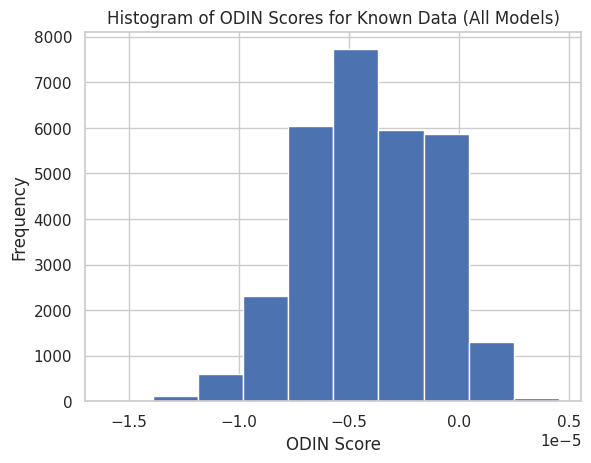

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

batch_size = 32
magnitude = 0.001
temperature = 1000
num_models = 20

loaded_models = [
    res_net01, res_net02, res_net03, res_net04, res_net05,
    res_net06, res_net07, res_net08, res_net09, res_net10,
    res_net11, res_net12, res_net13, res_net14, res_net15,
    res_net16, res_net17, res_net18, res_net19, res_net20
]

odin_scores_all_models = []

for i in range(num_models):
    logits_layer = loaded_models[i].layers[-2].output

    logits_model = tf.keras.Model(inputs=loaded_models[i].input, outputs=logits_layer)

    Known_data_X_test_as_tensor = tf.convert_to_tensor(Known_data_X_test)

    odin_scores_KNOWN = []

    for j in range(0, len(Known_data_X_test), batch_size):
        batch = Known_data_X_test_as_tensor[j:j+batch_size]

        with tf.device("/CPU:0"):
            logits = logits_model(batch)

        with tf.GradientTape() as tape:
            tape.watch(batch)
            logits = logits_model(batch)
        grads = tape.gradient(logits, batch)

        signed_grads = tf.sign(grads)

        perturbed_spectra = batch + magnitude * signed_grads

        with tf.device("/CPU:0"):
            perturbed_logits = logits_model(perturbed_spectra)

        scaled_perturbed_logits = perturbed_logits / temperature

        perturbed_softmax_output = tf.nn.softmax(scaled_perturbed_logits)

        max_perturbed_softmax_scores = tf.reduce_max(perturbed_softmax_output, axis=1)

        original_softmax_output = tf.nn.softmax(logits / temperature)
        max_softmax_scores = tf.reduce_max(original_softmax_output, axis=1)

        odin_scores_batch = max_softmax_scores - max_perturbed_softmax_scores

        odin_scores_KNOWN.extend(odin_scores_batch)

    odin_scores_KNOWN = np.array(odin_scores_KNOWN)
    odin_scores_all_models.append(odin_scores_KNOWN)

combined_odin_scores = np.concatenate(odin_scores_all_models)

plt.hist(combined_odin_scores, bins=10)
plt.xlabel('ODIN Score')
plt.ylabel('Frequency')
plt.title('Histogram of ODIN Scores for Known Data (All Models)')

plt.show()

In [ ]:
import os

folder_path = "/content/gdrive/MyDrive/Stanford_data"

file_name = "KNOWN_all_odin_scores_OBJp1p2p3.txt"
file_path = os.path.join(folder_path, file_name)

with open(file_path, 'w') as file:
    for score in combined_odin_scores:
        file.write(f"{score}\n")

# Computing OpenMax scores

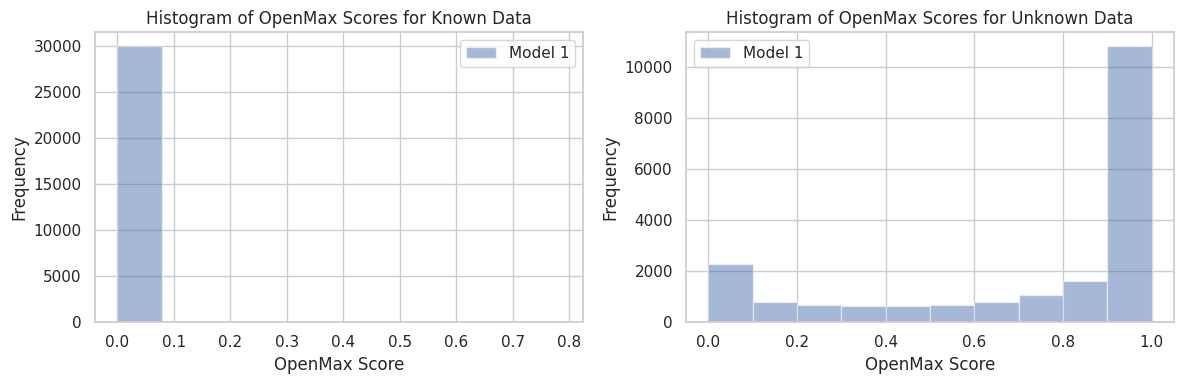

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

alpha = 1.0
num_models = 20

loaded_models = [res_net01, res_net02, res_net03, res_net04, res_net05, res_net06, res_net07, res_net08, res_net09, res_net10,
                 res_net11, res_net12, res_net13, res_net14, res_net15, res_net16, res_net17, res_net18, res_net19, res_net20]

openmax_scores_known = []
openmax_scores_unknown = []

Known_data_X_test_as_tensor = tf.convert_to_tensor(Known_data_X_test)
NeverSeen_data_X_test_as_tensor = tf.convert_to_tensor(NeverSeen_data_X_test)

for model in loaded_models:
    logits_layer = model.layers[-2].output

    logits_model = tf.keras.Model(inputs=model.input, outputs=logits_layer)
    known_logits = logits_model(Known_data_X_test_as_tensor)
    unknown_logits = logits_model(NeverSeen_data_X_test_as_tensor)

    max_known_logits = tf.reduce_max(known_logits, axis=1)
    max_unknown_logits = tf.reduce_max(unknown_logits, axis=1)

    scores_known = tf.exp(alpha * max_known_logits) / tf.reduce_sum(tf.exp(alpha * max_known_logits))

    scores_unknown = []
    for max_known, max_unknown in zip(max_known_logits, max_unknown_logits):
        unknown_score = tf.exp(alpha * max_known) / (tf.exp(alpha * max_known) + tf.exp(alpha * max_unknown))
        scores_unknown.append(unknown_score)

    openmax_scores_known.append(scores_known.numpy())
    openmax_scores_unknown.append(scores_unknown)

merged_openmax_scores_known = np.stack(openmax_scores_known, axis=1)
merged_openmax_scores_unknown = np.stack(openmax_scores_unknown, axis=1)

combined_openmax_scores_known = merged_openmax_scores_known.flatten()
combined_openmax_scores_unknown = merged_openmax_scores_unknown.flatten()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(combined_openmax_scores_known, bins=10, alpha=0.5, label=[f'Model {i+1}' for i in range(num_models)])
plt.xlabel('OpenMax Score')
plt.ylabel('Frequency')
plt.title('Histogram of OpenMax Scores for Known Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(combined_openmax_scores_unknown, bins=10, alpha=0.5, label=[f'Model {i+1}' for i in range(num_models)])
plt.xlabel('OpenMax Score')
plt.ylabel('Frequency')
plt.title('Histogram of OpenMax Scores for Unknown Data')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
np.savetxt('/content/gdrive/MyDrive/Stanford_data/OBJp1p2p3_combined_openmax_scores_known.txt', combined_openmax_scores_known)
np.savetxt('/content/gdrive/MyDrive/Stanford_data/OBJp1p2p3_combined_openmax_scores_unknown.txt', combined_openmax_scores_unknown)

# Compute Mahalanobis scores

In [ ]:
import numpy as np
from scipy.spatial import distance
import tensorflow as tf

def preprocess_data(data):
    preprocessed_data = data
    return preprocessed_data

def extract_deep_features(model, data):
    preprocessed_data = preprocess_data(data)
    deep_features = model.layers[-2].output
    deep_feature_model = tf.keras.Model(inputs=model.input, outputs=deep_features)
    extracted_features = deep_feature_model.predict(preprocessed_data)

    return extracted_features

deep_features_known = extract_deep_features(res_net01, Known_data_X_test)
deep_features_unknown = extract_deep_features(res_net01, NeverSeen_data_X_test)

mean_known = np.mean(deep_features_known, axis=0)
cov_known = np.cov(deep_features_known, rowvar=False)

cond_number = np.linalg.cond(cov_known)
print("Condition Number of Covariance Matrix (Known Data):", cond_number)

epsilon = 1e-6

if cond_number > 1 / epsilon:
    cov_known_reg = cov_known + epsilon * np.eye(cov_known.shape[0])
else:
    cov_known_reg = cov_known

mahalanobis_distances_known = []
for feature in deep_features_known:
    mahalanobis_distance = distance.mahalanobis(feature, mean_known, np.linalg.inv(cov_known_reg))
    mahalanobis_distances_known.append(mahalanobis_distance)

mahalanobis_distances_unknown = []
for feature in deep_features_unknown:
    mahalanobis_distance = distance.mahalanobis(feature, mean_known, np.linalg.inv(cov_known_reg))
    mahalanobis_distances_unknown.append(mahalanobis_distance)

threshold_known = 3.0
threshold_unknown = 4.0

ood_samples_known = [i for i, distance in enumerate(mahalanobis_distances_known) if distance > threshold_known]
ood_samples_unknown = [i for i, distance in enumerate(mahalanobis_distances_unknown) if distance > threshold_unknown]

print("Out-of-Distribution Sample Indices (Known Data):", ood_samples_known)
print("Out-of-Distribution Sample Indices (Unknown Data):", ood_samples_unknown)

32/32 [==============================] - 8s 199ms/step
Condition Number of Covariance Matrix (Known Data): 65841.76163376535
Out-of-Distribution Sample Indices (Known Data): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 

32/32 [==============================] - 8s 202ms/step
Condition Number of Covariance Matrix (Known Data): 1014.5143038876423
32/32 [==============================] - 7s 191ms/step
Condition Number of Covariance Matrix (Known Data): 3116.3373869594634
32/32 [==============================] - 8s 204ms/step
Condition Number of Covariance Matrix (Known Data): 6671.75904937343
32/32 [==============================] - 7s 190ms/step
Condition Number of Covariance Matrix (Known Data): 3320.868280341757
32/32 [==============================] - 7s 174ms/step
Condition Number of Covariance Matrix (Known Data): 8677.086327027171
32/32 [==============================] - 7s 180ms/step
Condition Number of Covariance Matrix (Known Data): 1025.4278755363198
32/32 [==============================] - 7s 173ms/step
Condition Number of Covariance Matrix (Known Data): 3352.0447787672465
32/32 [==============================] - 7s 175ms/step
Condition Number of Covariance Matrix (Known Data): 23659.825303500

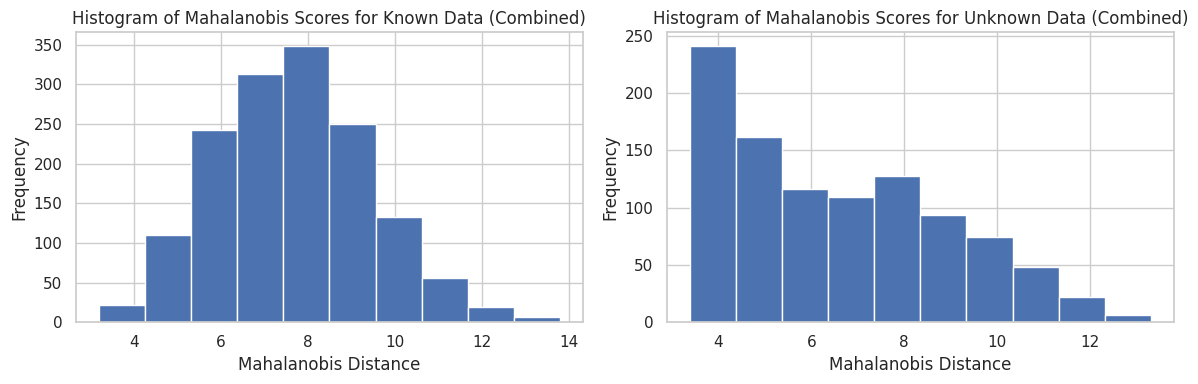

In [ ]:
import numpy as np
from scipy.spatial import distance
import tensorflow as tf
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def extract_deep_features(model, data):
    preprocessed_data = preprocess_data(data)
    deep_features = model.layers[-2].output
    deep_feature_model = tf.keras.Model(inputs=model.input, outputs=deep_features)
    extracted_features = deep_feature_model.predict(preprocessed_data)

    return extracted_features

loaded_models = [res_net01, res_net02, res_net03, res_net04, res_net05, res_net06, res_net07, res_net08, res_net09, res_net10,
                 res_net11, res_net12, res_net13, res_net14, res_net15, res_net16, res_net17, res_net18, res_net19, res_net20]

deep_features_known_all = []
mahalanobis_distances_known_all = []
deep_features_unknown_all = []
mahalanobis_distances_unknown_all = []
n_components = min(deep_features_known.shape[0], deep_features_known.shape[1]) - 1

for model in loaded_models:
    deep_features_known = extract_deep_features(model, Known_data_X_test)
    deep_features_unknown = extract_deep_features(model, NeverSeen_data_X_test)

    pca = PCA(n_components=n_components)
    deep_features_known_pca = pca.fit_transform(deep_features_known)
    deep_features_unknown_pca = pca.transform(deep_features_unknown)

    mean_known = np.mean(deep_features_known_pca, axis=0)
    cov_known = np.cov(deep_features_known_pca, rowvar=False)

    cond_number = np.linalg.cond(cov_known)
    print("Condition Number of Covariance Matrix (Known Data):", cond_number)

    epsilon = 1e-5

    if cond_number > 1 / epsilon:
        cov_known_reg = cov_known + epsilon * np.eye(cov_known.shape[0])
    else:
        cov_known_reg = cov_known

    mahalanobis_distances_known = []
    for feature in deep_features_known_pca:
        mahalanobis_distance = distance.mahalanobis(feature, mean_known, np.linalg.inv(cov_known_reg))
        mahalanobis_distances_known.append(mahalanobis_distance)

    mahalanobis_distances_unknown = []
    for feature in deep_features_unknown_pca:
        mahalanobis_distance = distance.mahalanobis(feature, mean_known, np.linalg.inv(cov_known_reg))
        mahalanobis_distances_unknown.append(mahalanobis_distance)

    deep_features_known_all.append(deep_features_known_pca)
    mahalanobis_distances_known_all.append(mahalanobis_distances_known)
    deep_features_unknown_all.append(deep_features_unknown_pca)
    mahalanobis_distances_unknown_all.append(mahalanobis_distances_unknown)

deep_features_known_combined = np.concatenate(deep_features_known_all, axis=-1)
mahalanobis_distances_known_combined = np.mean(mahalanobis_distances_known_all, axis=0)

deep_features_unknown_combined = np.concatenate(deep_features_unknown_all, axis=-1)
mahalanobis_distances_unknown_combined = np.mean(mahalanobis_distances_unknown_all, axis=0)

threshold_known = 3.0
threshold_unknown = 4.0

ood_samples_known = [i for i, distance in enumerate(mahalanobis_distances_known_combined) if distance > threshold_known]
ood_samples_unknown = [i for i, distance in enumerate(mahalanobis_distances_unknown_combined) if distance > threshold_unknown]

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(mahalanobis_distances_known_combined, bins=10)
plt.xlabel('Mahalanobis Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Mahalanobis Scores for Known Data (Combined)')

plt.subplot(1, 2, 2)
plt.hist(mahalanobis_distances_unknown_combined, bins=10)
plt.xlabel('Mahalanobis Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Mahalanobis Scores for Unknown Data (Combined)')

plt.tight_layout()
plt.show()


In [ ]:
np.savetxt(f'{folder_path}/mahalanobis_distances_known_combined_OBJp1p2p3.txt', mahalanobis_distances_known_combined)
np.savetxt(f'{folder_path}/mahalanobis_distances_unknown_combined_OBJp1p2p3.txt', mahalanobis_distances_unknown_combined)

#ODIN, example for 1 model

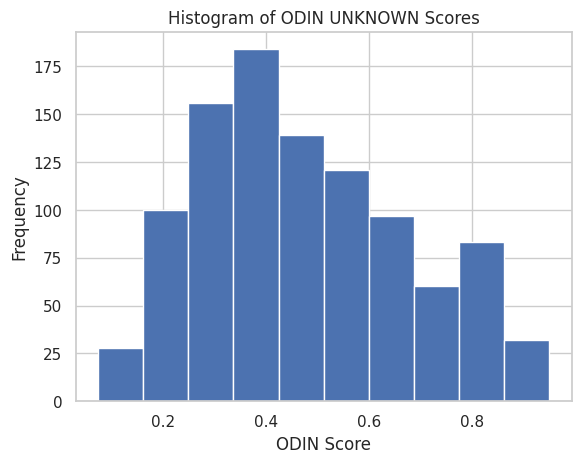

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

temperature = 1000
magnitude = 0.001

UN_Known_data_X_test_as_tensor = tf.convert_to_tensor(NeverSeen_data_X_test)

logits_layer = res_net01.layers[-2].output
logits_model = tf.keras.Model(inputs=res_net01.input, outputs=logits_layer)

odin_scores_UN_KNOWN = []

batch_size = 32

for i in range(0, len(NeverSeen_data_X_test), batch_size):
    batch = UN_Known_data_X_test_as_tensor[i:i+batch_size]

    with tf.device("/CPU:0"):
        logits = logits_model(batch)

    with tf.GradientTape() as tape:
        tape.watch(batch)
        output = logits_model(batch)
    grads = tape.gradient(output, batch)

    signed_grads = tf.sign(grads)

    perturbed_spectra = batch + magnitude * signed_grads

    with tf.device("/CPU:0"):
        perturbed_logits = logits_model(perturbed_spectra)

    scaled_perturbed_logits = perturbed_logits / temperature

    perturbed_softmax_output = tf.nn.softmax(scaled_perturbed_logits)

    max_perturbed_softmax_scores = tf.reduce_max(perturbed_softmax_output, axis=1)

    max_logits = tf.reduce_max(tf.nn.softmax(logits), axis=1)
    odin_scores_batch = max_logits - max_perturbed_softmax_scores

    odin_scores_UN_KNOWN.extend(odin_scores_batch)

odin_scores_UN_KNOWN = np.array(odin_scores_UN_KNOWN)

plt.hist(odin_scores_UN_KNOWN, bins=10)
plt.xlabel('ODIN Score')
plt.ylabel('Frequency')
plt.title('Histogram of ODIN UNKNOWN Scores')

plt.show()


In [ ]:
min(odin_scores_UN_KNOWN)

0.074482694

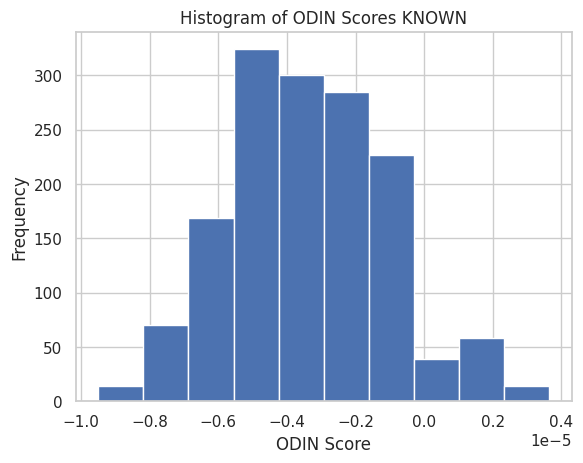

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

logits_layer = res_net01.layers[-2].output

logits_model = tf.keras.Model(inputs=res_net01.input, outputs=logits_layer)

Known_data_X_test_as_tensor = tf.convert_to_tensor(Known_data_X_test)

odin_scores_KNOWN = []

batch_size = 32
magnitude = 0.001

for i in range(0, len(Known_data_X_test), batch_size):
    batch = Known_data_X_test_as_tensor[i:i+batch_size]

    with tf.device("/CPU:0"):
        logits = logits_model(batch)

    with tf.GradientTape() as tape:
        tape.watch(batch)
        logits = logits_model(batch)
    grads = tape.gradient(logits, batch)

    signed_grads = tf.sign(grads)

    perturbed_spectra = batch + magnitude * signed_grads

    with tf.device("/CPU:0"):
        perturbed_logits = logits_model(perturbed_spectra)

    scaled_perturbed_logits = perturbed_logits / temperature

    perturbed_softmax_output = tf.nn.softmax(scaled_perturbed_logits)

    max_perturbed_softmax_scores = tf.reduce_max(perturbed_softmax_output, axis=1)

    original_softmax_output = tf.nn.softmax(logits / temperature)
    max_softmax_scores = tf.reduce_max(original_softmax_output, axis=1)

    odin_scores_batch = max_softmax_scores - max_perturbed_softmax_scores

    odin_scores_KNOWN.extend(odin_scores_batch)

odin_scores_KNOWN = np.array(odin_scores_KNOWN)

plt.hist(odin_scores_KNOWN, bins=10)
plt.xlabel('ODIN Score')
plt.ylabel('Frequency')
plt.title('Histogram of ODIN Scores KNOWN')

plt.show()

In [ ]:
max(odin_scores_KNOWN)

3.6470592e-06

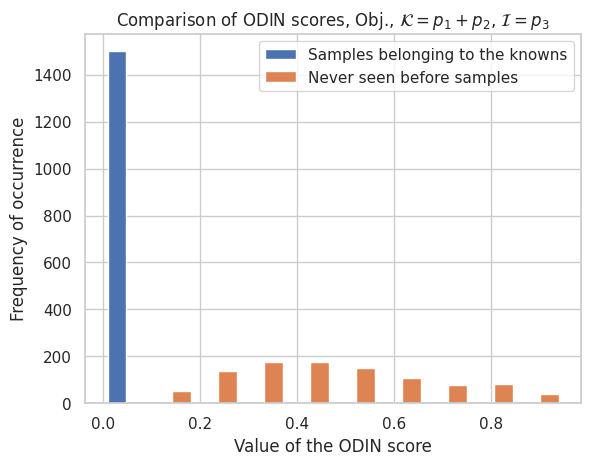

In [ ]:
plt.hist([odin_scores_KNOWN, odin_scores_UN_KNOWN], bins=10, label=['Samples belonging to the knowns', 'Never seen before samples'])  # Specify the number of bins and labels
plt.xlabel('Value of the ODIN score')
plt.ylabel('Frequency of occurrence')
plt.title('Comparison of ODIN scores, Obj., $\mathcal{K} = p_1 + p_2$, $\mathcal{I} = p_3$')

plt.legend()
plt.show()

# OpenMax, example of 1 model

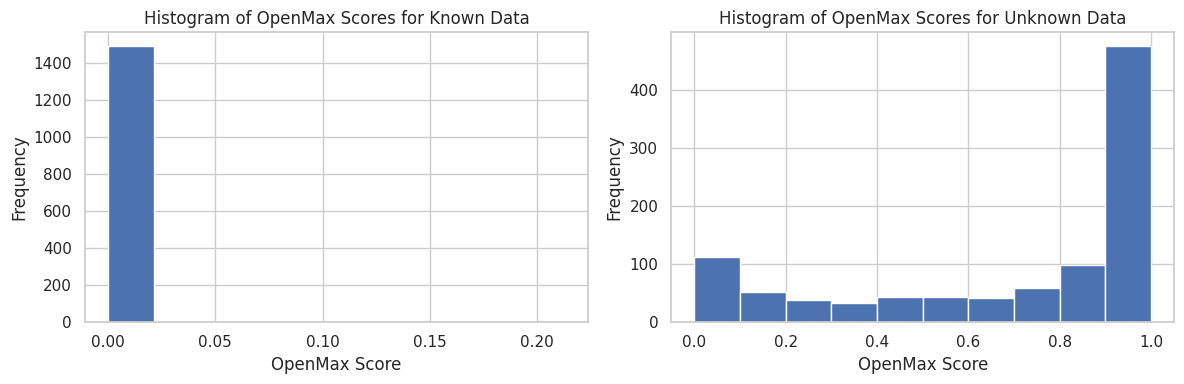

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

logits_layer = res_net01.layers[-2].output

logits_model = tf.keras.Model(inputs=res_net01.input, outputs=logits_layer)

Known_data_X_test_as_tensor = tf.convert_to_tensor(Known_data_X_test)
NeverSeen_data_X_test_as_tensor = tf.convert_to_tensor(NeverSeen_data_X_test)

known_logits = logits_model(Known_data_X_test_as_tensor)
unknown_logits = logits_model(NeverSeen_data_X_test_as_tensor)

max_known_logits = tf.reduce_max(known_logits, axis=1)
max_unknown_logits = tf.reduce_max(unknown_logits, axis=1)

def compute_openmax_scores_known(max_known_logits, alpha=1.0):
    scores_known = tf.exp(alpha * max_known_logits) / tf.reduce_sum(tf.exp(alpha * max_known_logits))
    return scores_known

openmax_scores_known = compute_openmax_scores_known(max_known_logits)

def compute_openmax_scores_unknown(max_known_logits, max_unknown_logits, alpha=1.0):
    scores_unknown = []
    for max_known, max_unknown in zip(max_known_logits, max_unknown_logits):
        unknown_score = tf.exp(alpha * max_known) / (tf.exp(alpha * max_known) + tf.exp(alpha * max_unknown))
        scores_unknown.append(unknown_score)
    return tf.stack(scores_unknown)

openmax_scores_unknown = compute_openmax_scores_unknown(max_known_logits, max_unknown_logits)

openmax_scores_known = openmax_scores_known.numpy()
openmax_scores_unknown = openmax_scores_unknown.numpy()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(openmax_scores_known, bins=10)
plt.xlabel('OpenMax Score')
plt.ylabel('Frequency')
plt.title('Histogram of OpenMax Scores for Known Data')

plt.subplot(1, 2, 2)
plt.hist(openmax_scores_unknown, bins=10)
plt.xlabel('OpenMax Score')
plt.ylabel('Frequency')
plt.title('Histogram of OpenMax Scores for Unknown Data')

plt.tight_layout()
plt.show()

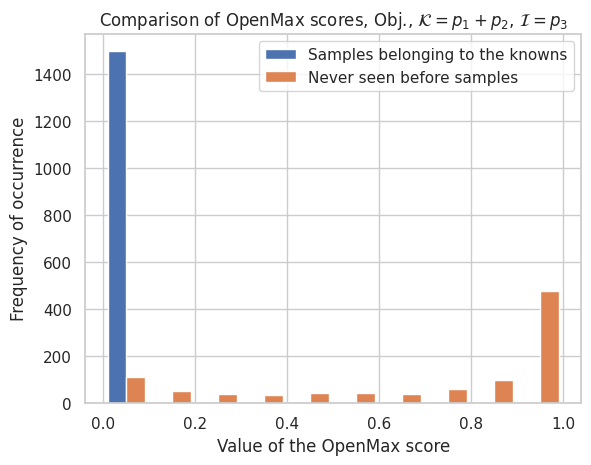

In [ ]:
plt.hist([openmax_scores_known, openmax_scores_unknown], bins=10, label=['Samples belonging to the knowns', 'Never seen before samples'])  # Specify the number of bins and labels

plt.xlabel('Value of the OpenMax score')
plt.ylabel('Frequency of occurrence')
plt.title('Comparison of OpenMax scores, Obj., $\mathcal{K} = p_1 + p_2$, $\mathcal{I} = p_3$')

plt.legend()

plt.show()

In [ ]:
max(openmax_scores_known)

0.21300527

In [ ]:
min(openmax_scores_unknown)

1.37318375e-05

In [ ]:
import numpy as np

# Sort the OpenMax scores in ascending order for both known and unknown data
openmax_scores_known_sorted = np.sort(openmax_scores_known)
openmax_scores_unknown_sorted = np.sort(openmax_scores_unknown)

# Find the range of values covered by the known and unknown scores
min_known_score = openmax_scores_known_sorted.min()
max_known_score = openmax_scores_known_sorted.max()
min_unknown_score = openmax_scores_unknown_sorted.min()
max_unknown_score = openmax_scores_unknown_sorted.max()

# Determine the bins for the histogram
bins = np.linspace(min(min_known_score, min_unknown_score), max(max_known_score, max_unknown_score), 1000)

# Compute histograms for known and unknown scores
hist_known, _ = np.histogram(openmax_scores_known_sorted, bins)
hist_unknown, _ = np.histogram(openmax_scores_unknown_sorted, bins)

# Calculate the intersection and union of histograms
intersection = np.minimum(hist_known, hist_unknown)
union = np.maximum(hist_known, hist_unknown)

# Compute the IoU (overlap) as a percentage
iou = np.sum(intersection) / np.sum(union) * 100

print(f"Overlap (IoU): {iou:.2f}%")

Overlap (IoU): 1.50%


# Mahalanobis, example for 1 model

In [ ]:
def preprocess_data(data):
    preprocessed_data = data
    return preprocessed_data


In [ ]:
import numpy as np
from scipy.spatial import distance
import tensorflow as tf

def preprocess_data(data):
    preprocessed_data = data
    return preprocessed_data

def extract_deep_features(model, data):

    preprocessed_data = preprocess_data(data)
    deep_features = model.layers[-2].output
    deep_feature_model = tf.keras.Model(inputs=model.input, outputs=deep_features)
    extracted_features = deep_feature_model.predict(preprocessed_data)

    return extracted_features

deep_features_known = extract_deep_features(res_net01, Known_data_X_test)
deep_features_unknown = extract_deep_features(res_net01, NeverSeen_data_X_test)

mean_known = np.mean(deep_features_known, axis=0)
cov_known = np.cov(deep_features_known, rowvar=False)

cond_number = np.linalg.cond(cov_known)
print("Condition Number of Covariance Matrix (Known Data):", cond_number)

epsilon = 1e-6

if cond_number > 1 / epsilon:
    cov_known_reg = cov_known + epsilon * np.eye(cov_known.shape[0])
else:
    cov_known_reg = cov_known

mahalanobis_distances_known = []
for feature in deep_features_known:
    mahalanobis_distance = distance.mahalanobis(feature, mean_known, np.linalg.inv(cov_known_reg))
    mahalanobis_distances_known.append(mahalanobis_distance)

mahalanobis_distances_unknown = []
for feature in deep_features_unknown:
    mahalanobis_distance = distance.mahalanobis(feature, mean_known, np.linalg.inv(cov_known_reg))
    mahalanobis_distances_unknown.append(mahalanobis_distance)

threshold_known = 3.0
threshold_unknown = 4.0

ood_samples_known = [i for i, distance in enumerate(mahalanobis_distances_known) if distance > threshold_known]
ood_samples_unknown = [i for i, distance in enumerate(mahalanobis_distances_unknown) if distance > threshold_unknown]

print("Out-of-Distribution Sample Indices (Known Data):", ood_samples_known)
print("Out-of-Distribution Sample Indices (Unknown Data):", ood_samples_unknown)

32/32 [==============================] - 31s 890ms/step
Condition Number of Covariance Matrix (Known Data): 65841.70942920828
Out-of-Distribution Sample Indices (Known Data): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,

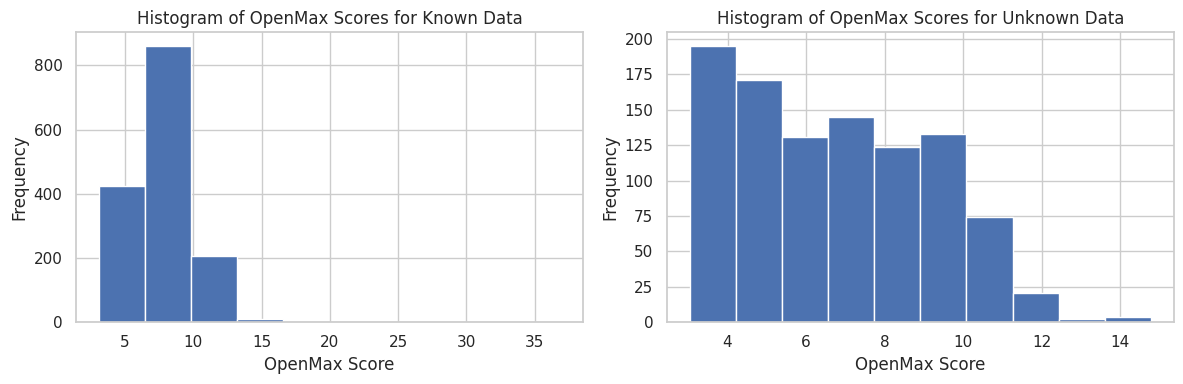

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(mahalanobis_distances_known, bins=10)
plt.xlabel('OpenMax Score')
plt.ylabel('Frequency')
plt.title('Histogram of OpenMax Scores for Known Data')

plt.subplot(1, 2, 2)
plt.hist(mahalanobis_distances_unknown, bins=10)
plt.xlabel('OpenMax Score')
plt.ylabel('Frequency')
plt.title('Histogram of OpenMax Scores for Unknown Data')

plt.tight_layout()
plt.show()

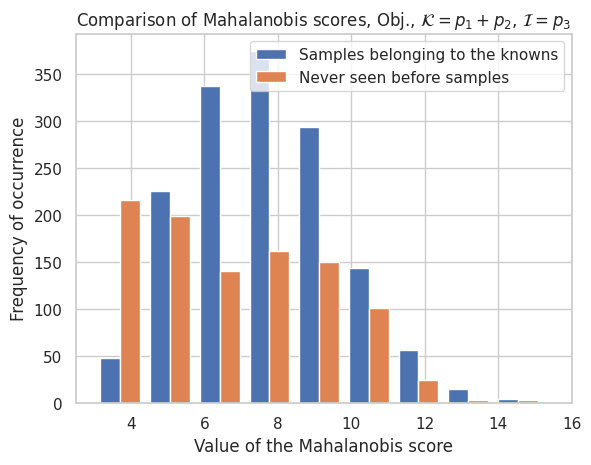

In [ ]:
plt.hist([mahalanobis_distances_known, mahalanobis_distances_unknown], bins=25, label=['Samples belonging to the knowns', 'Never seen before samples'])  # Specify the number of bins and labels
plt.xlim(2.5, 16)

plt.xlabel('Value of the Mahalanobis score')
plt.ylabel('Frequency of occurrence')
plt.title('Comparison of Mahalanobis scores, Obj., $\mathcal{K} = p_1 + p_2$, $\mathcal{I} = p_3$')

plt.legend()
plt.show()

In [ ]:
import numpy as np

mahalanobis_scores_known_sorted = np.sort(mahalanobis_distances_known)
mahalanobis_scores_unknown_sorted = np.sort(mahalanobis_distances_unknown)

min_known_score = mahalanobis_scores_known_sorted.min()
max_known_score = mahalanobis_scores_known_sorted.max()
min_unknown_score = mahalanobis_scores_unknown_sorted.min()
max_unknown_score = mahalanobis_scores_unknown_sorted.max()

bins = np.linspace(min(min_known_score, min_unknown_score), max(max_known_score, max_unknown_score), 1000)

hist_known, _ = np.histogram(mahalanobis_scores_known_sorted, bins)
hist_unknown, _ = np.histogram(mahalanobis_scores_unknown_sorted, bins)

intersection = np.minimum(hist_known, hist_unknown)
union = np.maximum(hist_known, hist_unknown)

iou = np.sum(intersection) / np.sum(union) * 100

print(f"Overlap (IoU): {iou:.2f}%")

Overlap (IoU): 41.08%


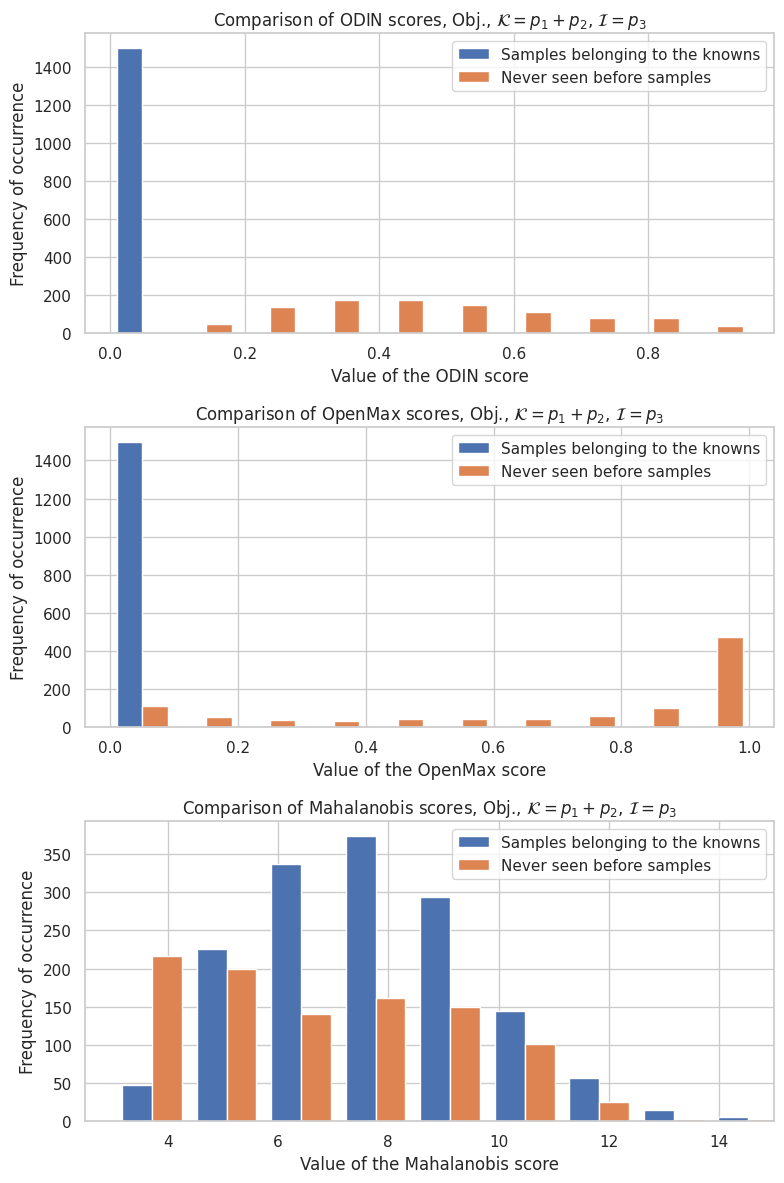

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(8, 12))

axs[0].hist([odin_scores_KNOWN, odin_scores_UN_KNOWN], bins=10, label=['Samples belonging to the knowns', 'Never seen before samples'])
axs[0].set_xlabel('Value of the ODIN score')
axs[0].set_ylabel('Frequency of occurrence')
axs[0].set_title('Comparison of ODIN scores, Obj., $\mathcal{K} = p_1 + p_2$, $\mathcal{I} = p_3$')
axs[0].legend()

axs[1].hist([openmax_scores_known, openmax_scores_unknown], bins=10, label=['Samples belonging to the knowns', 'Never seen before samples'])
axs[1].set_xlabel('Value of the OpenMax score')
axs[1].set_ylabel('Frequency of occurrence')
axs[1].set_title('Comparison of OpenMax scores, Obj., $\mathcal{K} = p_1 + p_2$, $\mathcal{I} = p_3$')
axs[1].legend()

axs[2].hist([mahalanobis_distances_known, mahalanobis_distances_unknown], bins=25, label=['Samples belonging to the knowns', 'Never seen before samples'])
axs[2].set_xlabel('Value of the Mahalanobis score')
axs[2].set_ylabel('Frequency of occurrence')
axs[2].set_title('Comparison of Mahalanobis scores, Obj., $\mathcal{K} = p_1 + p_2$, $\mathcal{I} = p_3$')
axs[2].legend()

axs[2].set_xlim(2.5, 15)

plt.tight_layout()

plt.show()



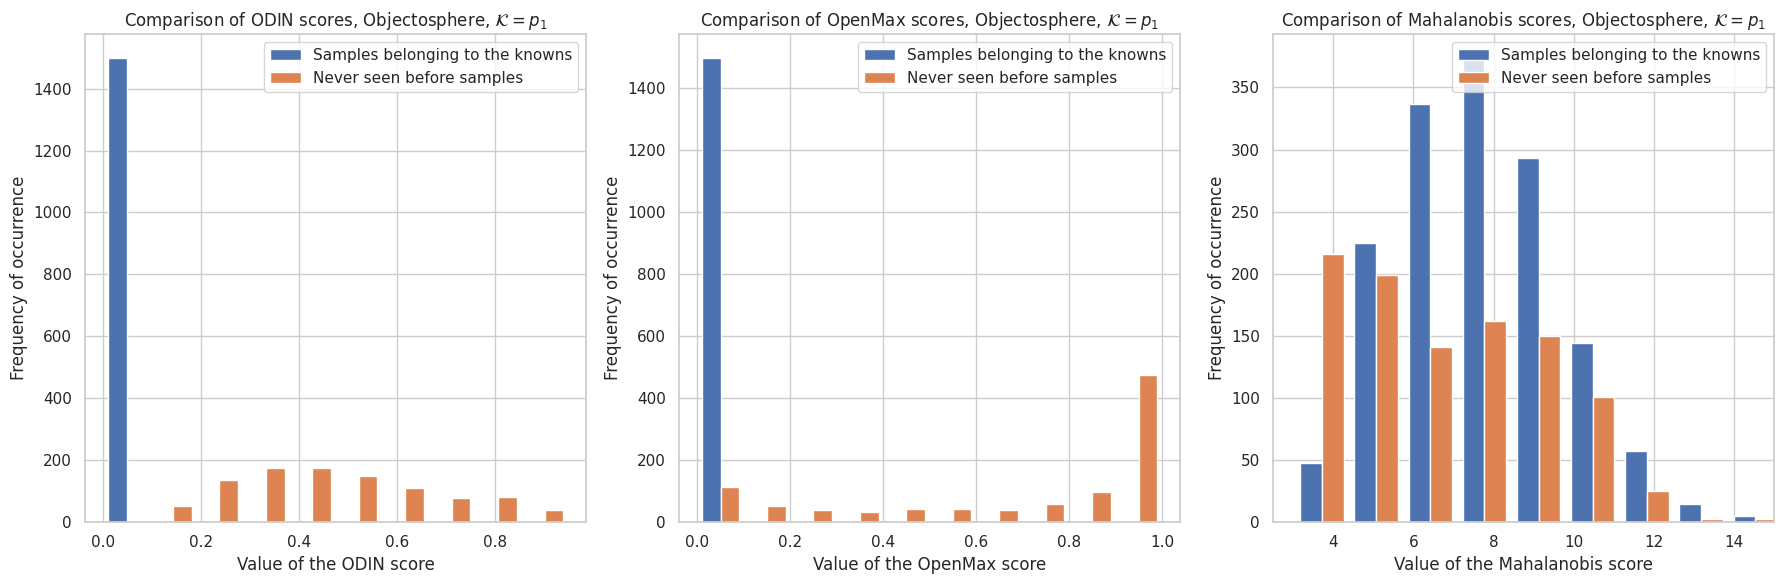

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].hist([odin_scores_KNOWN, odin_scores_UN_KNOWN], bins=10, label=['Samples belonging to the knowns', 'Never seen before samples'])
axs[0].set_xlabel('Value of the ODIN score')
axs[0].set_ylabel('Frequency of occurrence')
axs[0].set_title('Comparison of ODIN scores, Objectosphere, $\mathcal{K} = p_1$')
axs[0].legend()

axs[1].hist([openmax_scores_known, openmax_scores_unknown], bins=10, label=['Samples belonging to the knowns', 'Never seen before samples'])
axs[1].set_xlabel('Value of the OpenMax score')
axs[1].set_ylabel('Frequency of occurrence')
axs[1].set_title('Comparison of OpenMax scores, Objectosphere, $\mathcal{K} = p_1$')
axs[1].legend()

axs[2].hist([mahalanobis_distances_known, mahalanobis_distances_unknown], bins=25, label=['Samples belonging to the knowns', 'Never seen before samples'])
axs[2].set_xlabel('Value of the Mahalanobis score')
axs[2].set_ylabel('Frequency of occurrence')
axs[2].set_title('Comparison of Mahalanobis scores, Objectosphere, $\mathcal{K} = p_1$')
axs[2].legend()

axs[2].set_xlim(2.5, 15)
plt.tight_layout()
plt.show()



# Separating $\mathcal{K}$ and $\mathcal{N}$ by a fixed (class-independendent) threshold

In [ ]:
prediction_known = prediction_known_ensemble_3
prediction_unknown = prediction_unknown_ensemble_3

In [ ]:
def thresholding(threshold):
  true = 0
  for i in range(prediction_known.shape[0]):
    if prediction_known.argmax(axis=1)[i] == Known_data_X_test_label_int[i] and max(prediction_known[i]) > threshold:
      true += 1
  return true/(prediction_known.shape[0])

In [ ]:
CorrectThresholding = []
for i in range(90):
  CorrectThresholding.append([0.1 + 0.01*i,100*thresholding(0.1 + 0.01*i)])
for i in range(10):
  CorrectThresholding.append([0.99 + 0.001*i,100*thresholding(0.99 + 0.001*i)])
CorrectThresholding

[[0.1, 90.0],
 [0.11, 90.0],
 [0.12000000000000001, 89.86666666666666],
 [0.13, 89.86666666666666],
 [0.14, 89.86666666666666],
 [0.15000000000000002, 89.73333333333333],
 [0.16, 89.73333333333333],
 [0.17, 89.60000000000001],
 [0.18, 89.4],
 [0.19, 89.2],
 [0.2, 89.06666666666668],
 [0.21000000000000002, 89.0],
 [0.22, 89.0],
 [0.23, 89.0],
 [0.24000000000000002, 88.93333333333334],
 [0.25, 88.86666666666667],
 [0.26, 88.73333333333333],
 [0.27, 88.6],
 [0.28, 88.6],
 [0.29000000000000004, 88.33333333333333],
 [0.30000000000000004, 88.2],
 [0.31, 88.2],
 [0.32, 88.2],
 [0.33, 88.2],
 [0.33999999999999997, 88.06666666666668],
 [0.35, 87.73333333333333],
 [0.36, 87.6],
 [0.37, 87.46666666666667],
 [0.38, 87.26666666666667],
 [0.39, 87.2],
 [0.4, 87.0],
 [0.41000000000000003, 86.93333333333332],
 [0.42000000000000004, 86.93333333333332],
 [0.43000000000000005, 86.73333333333333],
 [0.44000000000000006, 86.6],
 [0.45000000000000007, 86.53333333333333],
 [0.45999999999999996, 86.3333333333

In [ ]:
def false_identify(threshold):
  false_identify = 0
  for i in range(prediction_known.shape[0]):
    if prediction_known.argmax(axis=1)[i] != Known_data_X_test_label_int[i] and max(prediction_known[i]) > threshold:
      false_identify += 1
  return false_identify/(prediction_known.shape[0])

In [ ]:
FalseIdentify = []
for i in range(90):
  FalseIdentify.append([0.1 + 0.01*i,100*false_identify(0.1 + 0.01*i)])
for i in range(10):
  FalseIdentify.append([0.99 + 0.001*i,100*false_identify(0.99 + 0.001*i)])
FalseIdentify

[[0.1, 9.333333333333334],
 [0.11, 9.333333333333334],
 [0.12000000000000001, 9.333333333333334],
 [0.13, 9.333333333333334],
 [0.14, 9.333333333333334],
 [0.15000000000000002, 9.266666666666666],
 [0.16, 9.266666666666666],
 [0.17, 9.266666666666666],
 [0.18, 9.266666666666666],
 [0.19, 9.266666666666666],
 [0.2, 9.2],
 [0.21000000000000002, 9.2],
 [0.22, 9.0],
 [0.23, 8.933333333333334],
 [0.24000000000000002, 8.866666666666667],
 [0.25, 8.866666666666667],
 [0.26, 8.799999999999999],
 [0.27, 8.6],
 [0.28, 8.533333333333333],
 [0.29000000000000004, 8.533333333333333],
 [0.30000000000000004, 8.466666666666667],
 [0.31, 8.4],
 [0.32, 8.4],
 [0.33, 8.133333333333333],
 [0.33999999999999997, 8.133333333333333],
 [0.35, 8.066666666666666],
 [0.36, 8.0],
 [0.37, 8.0],
 [0.38, 8.0],
 [0.39, 7.8],
 [0.4, 7.6],
 [0.41000000000000003, 7.466666666666668],
 [0.42000000000000004, 7.333333333333333],
 [0.43000000000000005, 7.333333333333333],
 [0.44000000000000006, 7.2666666666666675],
 [0.4500000

In [ ]:
def misclassifyunknown(threshold):
  misclassifyunknown = 0
  for i in range(prediction_unknown.shape[0]):
    if max(prediction_unknown[i]) > threshold:
      misclassifyunknown += 1
  return misclassifyunknown/(prediction_unknown.shape[0])

In [ ]:
UnknownMisclassify = []
for i in range(90):
  UnknownMisclassify.append([0.1 + 0.01*i,100*misclassifyunknown(0.1 + 0.01*i)])
for i in range(10):
  UnknownMisclassify.append([0.99 + 0.001*i,100*misclassifyunknown(0.99 + 0.001*i)])
UnknownMisclassify

[[0.1, 79.4],
 [0.11, 77.5],
 [0.12000000000000001, 76.0],
 [0.13, 74.5],
 [0.14, 73.6],
 [0.15000000000000002, 72.39999999999999],
 [0.16, 71.7],
 [0.17, 71.0],
 [0.18, 70.7],
 [0.19, 69.69999999999999],
 [0.2, 69.0],
 [0.21000000000000002, 68.60000000000001],
 [0.22, 67.9],
 [0.23, 67.10000000000001],
 [0.24000000000000002, 66.4],
 [0.25, 66.0],
 [0.26, 65.2],
 [0.27, 64.2],
 [0.28, 63.5],
 [0.29000000000000004, 62.9],
 [0.30000000000000004, 62.2],
 [0.31, 61.4],
 [0.32, 60.5],
 [0.33, 60.0],
 [0.33999999999999997, 59.599999999999994],
 [0.35, 58.8],
 [0.36, 58.199999999999996],
 [0.37, 57.3],
 [0.38, 56.599999999999994],
 [0.39, 56.10000000000001],
 [0.4, 55.300000000000004],
 [0.41000000000000003, 54.800000000000004],
 [0.42000000000000004, 54.7],
 [0.43000000000000005, 54.2],
 [0.44000000000000006, 53.6],
 [0.45000000000000007, 52.900000000000006],
 [0.45999999999999996, 52.2],
 [0.47, 51.6],
 [0.48, 50.7],
 [0.49, 50.4],
 [0.5, 49.6],
 [0.51, 48.5],
 [0.52, 47.4],
 [0.53, 47.0],


In [ ]:
def dontknow(threshold):
  notknown = 0
  for i in range(prediction_known.shape[0]):
    if max(prediction_known[i]) <= threshold:
      notknown += 1
  return notknown/(prediction_known.shape[0])

In [ ]:
DontKnowThresholding = []
for i in range(90):
  DontKnowThresholding.append([0.1 + 0.01*i,100*dontknow(0.1 + 0.01*i)])
for i in range(10):
  DontKnowThresholding.append([0.99 + 0.001*i,100*dontknow(0.99 + 0.001*i)])
DontKnowThresholding

[[0.1, 0.6666666666666667],
 [0.11, 0.6666666666666667],
 [0.12000000000000001, 0.8],
 [0.13, 0.8],
 [0.14, 0.8],
 [0.15000000000000002, 1.0],
 [0.16, 1.0],
 [0.17, 1.1333333333333333],
 [0.18, 1.3333333333333335],
 [0.19, 1.5333333333333332],
 [0.2, 1.7333333333333332],
 [0.21000000000000002, 1.7999999999999998],
 [0.22, 2.0],
 [0.23, 2.0666666666666664],
 [0.24000000000000002, 2.1999999999999997],
 [0.25, 2.2666666666666666],
 [0.26, 2.466666666666667],
 [0.27, 2.8000000000000003],
 [0.28, 2.8666666666666667],
 [0.29000000000000004, 3.1333333333333333],
 [0.30000000000000004, 3.3333333333333335],
 [0.31, 3.4000000000000004],
 [0.32, 3.4000000000000004],
 [0.33, 3.6666666666666665],
 [0.33999999999999997, 3.8],
 [0.35, 4.2],
 [0.36, 4.3999999999999995],
 [0.37, 4.533333333333333],
 [0.38, 4.733333333333333],
 [0.39, 5.0],
 [0.4, 5.4],
 [0.41000000000000003, 5.6000000000000005],
 [0.42000000000000004, 5.733333333333333],
 [0.43000000000000005, 5.933333333333334],
 [0.44000000000000006,

In [ ]:
aligned_array = [element for row in prediction_unknown for element in row]
max_value = max(aligned_array)

print("The maximum value in the aligned array is:", max_value)

The maximum value in the aligned array is: 0.9999691


In [ ]:
thresholding(max_value)

0.13066666666666665

In [ ]:
dontknow(max_value)

0.8693333333333333

In [ ]:
misclassifyunknown(max_value)

0.0

In [ ]:
false_identify(max_value)

0.0

In [ ]:
DontKnowThresholdingANOTHER = []

for i in range(89):
  DontKnowThresholdingANOTHER.append([100*thresholding(0.1 + 0.01*i),100*dontknow(0.1 + 0.01*i),])

for i in range(10):
  DontKnowThresholdingANOTHER.append([100*thresholding(0.99 + 0.001*i),100*dontknow(0.99 + 0.001*i),])

for i in range(10):
  DontKnowThresholdingANOTHER.append([100*thresholding(0.999 + 0.0001*i),100*dontknow(0.999 + 0.0001*i),])

for i in range(10):
  DontKnowThresholdingANOTHER.append([100*thresholding(0.9999 + 0.00001*i),100*dontknow(0.9999 + 0.00001*i),])

for i in range(9):
  DontKnowThresholdingANOTHER.append([100*thresholding(0.99999 + 0.000001*i),100*dontknow(0.99999 + 0.000001*i),])

DontKnowThresholdingANOTHER.append([100*thresholding(max_value),100*dontknow(max_value)])

DontKnowThresholdingANOTHER

[[90.0, 0.6666666666666667],
 [90.0, 0.6666666666666667],
 [89.86666666666666, 0.8],
 [89.86666666666666, 0.8],
 [89.86666666666666, 0.8],
 [89.73333333333333, 1.0],
 [89.73333333333333, 1.0],
 [89.60000000000001, 1.1333333333333333],
 [89.4, 1.3333333333333335],
 [89.2, 1.5333333333333332],
 [89.06666666666668, 1.7333333333333332],
 [89.0, 1.7999999999999998],
 [89.0, 2.0],
 [89.0, 2.0666666666666664],
 [88.93333333333334, 2.1999999999999997],
 [88.86666666666667, 2.2666666666666666],
 [88.73333333333333, 2.466666666666667],
 [88.6, 2.8000000000000003],
 [88.6, 2.8666666666666667],
 [88.33333333333333, 3.1333333333333333],
 [88.2, 3.3333333333333335],
 [88.2, 3.4000000000000004],
 [88.2, 3.4000000000000004],
 [88.2, 3.6666666666666665],
 [88.06666666666668, 3.8],
 [87.73333333333333, 4.2],
 [87.6, 4.3999999999999995],
 [87.46666666666667, 4.533333333333333],
 [87.26666666666667, 4.733333333333333],
 [87.2, 5.0],
 [87.0, 5.4],
 [86.93333333333332, 5.6000000000000005],
 [86.933333333333

In [ ]:
UnknownMisclassifyANOTHER = []
for i in range(89):
  UnknownMisclassifyANOTHER.append([100*thresholding(0.1 + 0.01*i),100*misclassifyunknown(0.1 + 0.01*i),])
for i in range(10):
  UnknownMisclassifyANOTHER.append([100*thresholding(0.99 + 0.001*i),100*misclassifyunknown(0.99 + 0.001*i),])

for i in range(10):
  UnknownMisclassifyANOTHER.append([100*thresholding(0.999 + 0.0001*i),100*misclassifyunknown(0.999 + 0.0001*i),])

for i in range(10):
  UnknownMisclassifyANOTHER.append([100*thresholding(0.9999 + 0.00001*i),100*misclassifyunknown(0.9999 + 0.00001*i),])

for i in range(9):
  UnknownMisclassifyANOTHER.append([100*thresholding(0.99999 + 0.000001*i),100*misclassifyunknown(0.99999 + 0.000001*i),])

UnknownMisclassifyANOTHER.append([100*thresholding(max_value),100*misclassifyunknown(max_value),])

UnknownMisclassifyANOTHER

[[90.0, 79.4],
 [90.0, 77.5],
 [89.86666666666666, 76.0],
 [89.86666666666666, 74.5],
 [89.86666666666666, 73.6],
 [89.73333333333333, 72.39999999999999],
 [89.73333333333333, 71.7],
 [89.60000000000001, 71.0],
 [89.4, 70.7],
 [89.2, 69.69999999999999],
 [89.06666666666668, 69.0],
 [89.0, 68.60000000000001],
 [89.0, 67.9],
 [89.0, 67.10000000000001],
 [88.93333333333334, 66.4],
 [88.86666666666667, 66.0],
 [88.73333333333333, 65.2],
 [88.6, 64.2],
 [88.6, 63.5],
 [88.33333333333333, 62.9],
 [88.2, 62.2],
 [88.2, 61.4],
 [88.2, 60.5],
 [88.2, 60.0],
 [88.06666666666668, 59.599999999999994],
 [87.73333333333333, 58.8],
 [87.6, 58.199999999999996],
 [87.46666666666667, 57.3],
 [87.26666666666667, 56.599999999999994],
 [87.2, 56.10000000000001],
 [87.0, 55.300000000000004],
 [86.93333333333332, 54.800000000000004],
 [86.93333333333332, 54.7],
 [86.73333333333333, 54.2],
 [86.6, 53.6],
 [86.53333333333333, 52.900000000000006],
 [86.33333333333333, 52.2],
 [86.33333333333333, 51.6],
 [86.266

In [ ]:
FalseIdentifyANOTHER = []
for i in range(89):
  FalseIdentifyANOTHER.append([100*thresholding(0.1 + 0.01*i),100*false_identify(0.1 + 0.01*i),])
for i in range(10):
  FalseIdentifyANOTHER.append([100*thresholding(0.99 + 0.001*i),100*false_identify(0.99 + 0.001*i)])

for i in range(10):
  FalseIdentifyANOTHER.append([100*thresholding(0.999 + 0.0001*i),100*false_identify(0.999 + 0.0001*i),])

for i in range(10):
  FalseIdentifyANOTHER.append([100*thresholding(0.9999 + 0.00001*i),100*false_identify(0.9999 + 0.00001*i),])

for i in range(9):
  FalseIdentifyANOTHER.append([100*thresholding(0.99999 + 0.000001*i),100*false_identify(0.99999 + 0.000001*i),])

FalseIdentifyANOTHER.append([100*thresholding(max_value),100*false_identify(max_value),])
FalseIdentifyANOTHER

[[90.0, 9.333333333333334],
 [90.0, 9.333333333333334],
 [89.86666666666666, 9.333333333333334],
 [89.86666666666666, 9.333333333333334],
 [89.86666666666666, 9.333333333333334],
 [89.73333333333333, 9.266666666666666],
 [89.73333333333333, 9.266666666666666],
 [89.60000000000001, 9.266666666666666],
 [89.4, 9.266666666666666],
 [89.2, 9.266666666666666],
 [89.06666666666668, 9.2],
 [89.0, 9.2],
 [89.0, 9.0],
 [89.0, 8.933333333333334],
 [88.93333333333334, 8.866666666666667],
 [88.86666666666667, 8.866666666666667],
 [88.73333333333333, 8.799999999999999],
 [88.6, 8.6],
 [88.6, 8.533333333333333],
 [88.33333333333333, 8.533333333333333],
 [88.2, 8.466666666666667],
 [88.2, 8.4],
 [88.2, 8.4],
 [88.2, 8.133333333333333],
 [88.06666666666668, 8.133333333333333],
 [87.73333333333333, 8.066666666666666],
 [87.6, 8.0],
 [87.46666666666667, 8.0],
 [87.26666666666667, 8.0],
 [87.2, 7.8],
 [87.0, 7.6],
 [86.93333333333332, 7.466666666666668],
 [86.93333333333332, 7.333333333333333],
 [86.7333

In [ ]:
prediction_known = prediction_known_ensemble_1
prediction_unknown = prediction_unknown_ensemble_1

In [ ]:
aligned_array = [element for row in prediction_unknown for element in row]
max_value = max(aligned_array)

print("The maximum value in the aligned array is:", max_value)


The maximum value in the aligned array is: 0.99998504


In [ ]:
thresholding(max_value)

0.11

In [ ]:
dontknow(max_value)

0.89

In [ ]:
misclassifyunknown(max_value)

0.0

In [ ]:
false_identify(max_value)

0.0

# Class-adaptive threshold

# Run #1

In [ ]:
prediction_known = prediction_known_ensemble_1
prediction_unknown = prediction_unknown_ensemble_1

In [ ]:
ThresholdNeverSeenBefores = []
for i in range(15):
  ThresholdNeverSeenBefores.append(np.max(prediction_unknown[:,i]))

In [ ]:
C_count0 = 0
for i in range(100):
  if prediction_known[i,0] > ThresholdNeverSeenBefores[0] and np.argmax(prediction_known[i]) == 0:
    C_count0 += 1
  else:
    C_count0 += 0
C_count0

5

In [ ]:
mistake0 = 0
for i in range(100):
  if np.argmax(prediction_known[i]) != 0 and max(prediction_known[i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[i])]:
    mistake0 += 1
    print(i)
  else:
    mistake0 += 0
mistake0
print("Number of mistakes in this class:",mistake0)

54
Number of mistakes in this class: 1


In [ ]:
ThresholdNeverSeenBefores[np.argmax(prediction_known[54])] = max(prediction_known[54])

In [ ]:
mistake0 = 0
for i in range(100):
  if np.argmax(prediction_known[i]) != 0 and max(prediction_known[i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[i])]:
    mistake0 += 1
    print(i)
  else:
    mistake0 += 0
mistake0
print("Number of mistakes in this class:",mistake0)

Number of mistakes in this class: 0


In [ ]:
C_count1 = 0
for i in range(100):
  if prediction_known[100 + i,1] > ThresholdNeverSeenBefores[1] and np.argmax(prediction_known[100 + i]) == 1:
    C_count1 += 1
  else:
    C_count1 += 0
C_count1

75

In [ ]:
mistake1 = 0
for i in range(100):
  if np.argmax(prediction_known[100 + i]) != 1 and max(prediction_known[100 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[100 + i])]:
    mistake1 += 1
    print(100 + i)
  else:
    mistake1 += 0
mistake1
print("Number of mistakes in this class:",mistake1)

144
Number of mistakes in this class: 1


In [ ]:
ThresholdNeverSeenBefores[np.argmax(prediction_known[144])] = max(prediction_known[144])

In [ ]:
mistake1 = 0
for i in range(100):
  if np.argmax(prediction_known[100 + i]) != 1 and max(prediction_known[100 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[100 + i])]:
    mistake1 += 1
    print(100 + i)
  else:
    mistake1 += 0
mistake1
print("Number of mistakes in this class:",mistake1)

Number of mistakes in this class: 0


In [ ]:
C_count2 = 0
for i in range(100):
  if prediction_known[200 + i,2] > ThresholdNeverSeenBefores[2] and np.argmax(prediction_known[200 + i]) == 2:
    C_count2 += 1
  else:
    C_count2 += 0
C_count2

12

In [ ]:
mistake2 = 0
for i in range(100):
  if np.argmax(prediction_known[200 + i]) != 2 and max(prediction_known[200 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[200 + i])]:
    mistake2 += 1
    print(200 + i)
  else:
    mistake2 += 0
mistake2
print("Number of mistakes in this class:",mistake2)

216
296
Number of mistakes in this class: 2


In [ ]:
ThresholdNeverSeenBefores[np.argmax(prediction_known[296])] = max(prediction_known[296])

In [ ]:
mistake2 = 0
for i in range(100):
  if np.argmax(prediction_known[200 + i]) != 2 and max(prediction_known[200 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[200 + i])]:
    mistake2 += 1
    print(200 + i)
  else:
    mistake2 += 0
mistake2
print("Number of mistakes in this class:",mistake2)

Number of mistakes in this class: 0


In [ ]:
C_count3 = 0
for i in range(100):
  if prediction_known[300 + i,3] > ThresholdNeverSeenBefores[3] and np.argmax(prediction_known[300 + i]) == 3:
    C_count3 += 1
  else:
    C_count3 += 0
C_count3

94

In [ ]:
mistake3 = 0
for i in range(100):
  if np.argmax(prediction_known[300 + i]) != 3 and max(prediction_known[300 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[300 + i])]:
    mistake3 += 1
    print(300 + i)
  else:
    mistake3 += 0
mistake3
print("Number of mistakes in this class:",mistake3)

Number of mistakes in this class: 0


In [ ]:
C_count4 = 0
for i in range(100):
  if prediction_known[400 + i,4] > ThresholdNeverSeenBefores[4] and np.argmax(prediction_known[400 + i]) == 4:
    C_count4 += 1
  else:
    C_count4 += 0
C_count4

98

In [ ]:
mistake4 = 0
for i in range(100):
  if np.argmax(prediction_known[400 + i]) != 4 and max(prediction_known[400 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[400 + i])]:
    mistake4 += 1
    print(400 + i)
  else:
    mistake4 += 0
print("Number of mistakes in this class:",mistake4)

Number of mistakes in this class: 0


In [ ]:
C_count5 = 0
for i in range(100):
  if prediction_known[500 + i,5] > ThresholdNeverSeenBefores[5] and np.argmax(prediction_known[500 + i]) == 5:
    C_count5 += 1
  else:
    C_count5 += 0
C_count5

83

In [ ]:
mistake5 = 0
for i in range(100):
  if np.argmax(prediction_known[500 + i]) != 5 and max(prediction_known[500 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[500 + i])]:
    mistake5 += 1
    print(500 + i)
  else:
    mistake5 += 0
print("Number of mistakes in this class:",mistake5)

501
509
515
518
524
526
533
535
540
553
559
560
566
570
572
579
586
Number of mistakes in this class: 17


In [ ]:
ThresholdNeverSeenBefores[np.argmax(prediction_known[533])] = max(prediction_known[533])

In [ ]:
mistake5 = 0
for i in range(100):
  if np.argmax(prediction_known[500 + i]) != 5 and max(prediction_known[500 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[500 + i])]:
    mistake5 += 1
    print(500 + i)
  else:
    mistake5 += 0
print("Number of mistakes in this class:",mistake5)

Number of mistakes in this class: 0


In [ ]:
C_count6 = 0
for i in range(100):
  if prediction_known[600 + i,6] > ThresholdNeverSeenBefores[6] and np.argmax(prediction_known[600 + i]) == 6:
    C_count6 += 1
  else:
    C_count6 += 0
C_count6

76

In [ ]:
mistake6 = 0
for i in range(100):
  if np.argmax(prediction_known[600 + i]) != 6 and max(prediction_known[600 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[600 + i])]:
    mistake6 += 1
    print(600 + i)
  else:
    mistake6 += 0
print("Number of mistakes in this class:",mistake6)

607
609
610
627
639
648
658
670
688
690
696
Number of mistakes in this class: 11


In [ ]:
ThresholdNeverSeenBefores[np.argmax(prediction_known[610])] = max(prediction_known[610])

In [ ]:
mistake6 = 0
for i in range(100):
  if np.argmax(prediction_known[600 + i]) != 6 and max(prediction_known[600 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[600 + i])]:
    mistake6 += 1
    print(600 + i)
  else:
    mistake6 += 0
print("Number of mistakes in this class:",mistake6)

Number of mistakes in this class: 0


In [ ]:
C_count7 = 0
for i in range(100):
  if prediction_known[700 + i,7] > ThresholdNeverSeenBefores[7]  and np.argmax(prediction_known[700 + i]) == 7:
    C_count7 += 1
  else:
    C_count7 += 0
C_count7

58

In [ ]:
mistake7 = 0
for i in range(100):
  if np.argmax(prediction_known[700 + i]) != 7 and max(prediction_known[700 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[700 + i])]:
    mistake7 += 1
    print(700 + i)
  else:
    mistake7 += 0
print("Number of mistakes in this class:",mistake7)

795
Number of mistakes in this class: 1


In [ ]:
ThresholdNeverSeenBefores[np.argmax(prediction_known[795])] = max(prediction_known[795])

In [ ]:
mistake7 = 0
for i in range(100):
  if np.argmax(prediction_known[700 + i]) != 7 and max(prediction_known[700 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[700 + i])]:
    mistake7 += 1
    print(700 + i)
  else:
    mistake7 += 0
print("Number of mistakes in this class:",mistake7)

Number of mistakes in this class: 0


In [ ]:
C_count8 = 0
for i in range(100):
  if prediction_known[800 + i,8] > ThresholdNeverSeenBefores[8] and np.argmax(prediction_known[800 + i]) == 8:
    C_count8 += 1
  else:
    C_count8 += 0
C_count8

90

In [ ]:
mistake8 = 0
for i in range(100):
  if np.argmax(prediction_known[800 + i]) != 8 and max(prediction_known[800 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[800 + i])]:
    mistake8 += 1
    print(800 + i)
  else:
    mistake8 += 0
print("Number of mistakes in this class:",mistake8)

Number of mistakes in this class: 0


In [ ]:
C_count9 = 0
for i in range(100):
  if prediction_known[900 + i,9] > ThresholdNeverSeenBefores[9] and np.argmax(prediction_known[900 + i]) == 9:
    C_count9 += 1
  else:
    C_count9 += 0
C_count9

9

In [ ]:
mistake9 = 0
for i in range(100):
  if np.argmax(prediction_known[900 + i]) != 9 and max(prediction_known[900 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[900 + i])]:
    mistake9 += 1
    print(900 + i)
  else:
    mistake9 += 0
print("Number of mistakes in this class:",mistake9)

911
Number of mistakes in this class: 1


In [ ]:
ThresholdNeverSeenBefores[np.argmax(prediction_known[911])] = max(prediction_known[911])

In [ ]:
mistake9 = 0
for i in range(100):
  if np.argmax(prediction_known[900 + i]) != 9 and max(prediction_known[900 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[900 + i])]:
    mistake9 += 1
    print(900 + i)
  else:
    mistake9 += 0
print("Number of mistakes in this class:",mistake9)

Number of mistakes in this class: 0


In [ ]:
C_count10 = 0
for i in range(100):
  if prediction_known[i + 10*100,10] > ThresholdNeverSeenBefores[10] and np.argmax(prediction_known[i + 10*100]) == 10:
    C_count10 += 1
  else:
    C_count10 += 0
C_count10

45

In [ ]:
mistake10 = 0
for i in range(100):
  if np.argmax(prediction_known[1000 + i]) != 10 and max(prediction_known[1000 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[1000 + i])]:
    mistake10 += 1
    print(1000 + i)
  else:
    mistake10 += 0
print("Number of mistakes in this class:",mistake10)

1018
Number of mistakes in this class: 1


In [ ]:
ThresholdNeverSeenBefores[np.argmax(prediction_known[1018])] = max(prediction_known[1018])

In [ ]:
mistake10 = 0
for i in range(100):
  if np.argmax(prediction_known[1000 + i]) != 10 and max(prediction_known[1000 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[1000 + i])]:
    mistake10 += 1
    print(1000 + i)
  else:
    mistake10 += 0
print("Number of mistakes in this class:",mistake10)

Number of mistakes in this class: 0


In [ ]:
C_count11 = 0
for i in range(100):
  if prediction_known[i + 11*100,11] > ThresholdNeverSeenBefores[11] and np.argmax(prediction_known[i + 11*100]) == 11:
    C_count11 += 1
  else:
    C_count11 += 0
C_count11

41

In [ ]:
mistake11 = 0
for i in range(100):
  if np.argmax(prediction_known[1100 + i]) != 11 and max(prediction_known[1100 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[1100 + i])]:
    mistake11 += 1
    print(1100 + i)
  else:
    mistake11 += 0
print("Number of mistakes in this class:",mistake11)

1117
Number of mistakes in this class: 1


In [ ]:
ThresholdNeverSeenBefores[np.argmax(prediction_known[1117])] = max(prediction_known[1117])

In [ ]:
mistake11 = 0
for i in range(100):
  if np.argmax(prediction_known[1100 + i]) != 11 and max(prediction_known[1100 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[1100 + i])]:
    mistake11 += 1
    print(1100 + i)
  else:
    mistake11 += 0
print("Number of mistakes in this class:",mistake11)

Number of mistakes in this class: 0


In [ ]:
C_count12 = 0
for i in range(100):
  if prediction_known[i + 12*100,12] > ThresholdNeverSeenBefores[12] and np.argmax(prediction_known[i + 12*100]) == 12:
    C_count12 += 1
  else:
    C_count12 += 0
C_count12

55

In [ ]:
mistake12 = 0
for i in range(100):
  if np.argmax(prediction_known[1200 + i]) != 12 and max(prediction_known[1200 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[1200 + i])]:
    mistake12 += 1
    print(1200 + i)
  else:
    mistake12 += 0
print("Number of mistakes in this class:",mistake12)

Number of mistakes in this class: 0


In [ ]:
C_count13 = 0
for i in range(100):
  if prediction_known[i + 13*100,13] > ThresholdNeverSeenBefores[13] and np.argmax(prediction_known[i + 13*100]) == 13:
    C_count13 += 1
  else:
    C_count13 += 0
C_count13

99

In [ ]:
mistake13 = 0
for i in range(100):
  if np.argmax(prediction_known[1300 + i]) != 13 and max(prediction_known[1300 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[1300 + i])]:
    mistake13 += 1
    print(1300 + i)
  else:
    mistake13 += 0
print("Number of mistakes in this class:",mistake13)

Number of mistakes in this class: 0


In [ ]:
C_count14 = 0
for i in range(100):
  if prediction_known[i + 14*100,14] > ThresholdNeverSeenBefores[14] and np.argmax(prediction_known[i + 14*100]) == 14:
    C_count14 += 1
  else:
    C_count14 += 0
C_count14

93

In [ ]:
mistake14 = 0
for i in range(100):
  if np.argmax(prediction_known[1400 + i]) != 14 and max(prediction_known[1400 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[1400 + i])]:
    mistake14 += 1
    print(1400 + i)
  else:
    mistake14 += 0
print("Number of mistakes in this class:",mistake14)

Number of mistakes in this class: 0


In [ ]:
mistake0 = 0
for i in range(100):
  if np.argmax(prediction_known[i]) != 0 and max(prediction_known[i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[i])]:
    mistake0 += 1
    print(i)
  else:
    mistake0 += 0

mistake1 = 0
for i in range(100):
  if np.argmax(prediction_known[100 + i]) != 1 and max(prediction_known[100 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[100 + i])]:
    mistake1 += 1
    print(100 + i)
  else:
    mistake1 += 0

mistake2 = 0
for i in range(100):
  if np.argmax(prediction_known[200 + i]) != 2 and max(prediction_known[200 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[200 + i])]:
    mistake2 += 1
    print(200 + i)
  else:
    mistake2 += 0

mistake3 = 0
for i in range(100):
  if np.argmax(prediction_known[300 + i]) != 3 and max(prediction_known[300 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[300 + i])]:
    mistake3 += 1
    print(300 + i)
  else:
    mistake3 += 0

mistake4 = 0
for i in range(100):
  if np.argmax(prediction_known[400 + i]) != 4 and max(prediction_known[400 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[400 + i])]:
    mistake4 += 1
    print(400 + i)
  else:
    mistake4 += 0

mistake5 = 0
for i in range(100):
  if np.argmax(prediction_known[500 + i]) != 5 and max(prediction_known[500 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[500 + i])]:
    mistake5 += 1
    print(500 + i)
  else:
    mistake5 += 0

mistake6 = 0
for i in range(100):
  if np.argmax(prediction_known[600 + i]) != 6 and max(prediction_known[600 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[600 + i])]:
    mistake6 += 1
    print(600 + i)
  else:
    mistake6 += 0

mistake7 = 0
for i in range(100):
  if np.argmax(prediction_known[700 + i]) != 7 and max(prediction_known[700 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[700 + i])]:
    mistake7 += 1
    print(700 + i)
  else:
    mistake7 += 0

mistake8 = 0
for i in range(100):
  if np.argmax(prediction_known[800 + i]) != 8 and max(prediction_known[800 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[800 + i])]:
    mistake8 += 1
    print(800 + i)
  else:
    mistake8 += 0

mistake9 = 0
for i in range(100):
  if np.argmax(prediction_known[900 + i]) != 9 and max(prediction_known[900 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[900 + i])]:
    mistake9 += 1
    print(900 + i)
  else:
    mistake9 += 0

mistake10 = 0
for i in range(100):
  if np.argmax(prediction_known[1000 + i]) != 10 and max(prediction_known[1000 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[1000 + i])]:
    mistake10 += 1
    print(1000 + i)
  else:
    mistake10 += 0

mistake11 = 0
for i in range(100):
  if np.argmax(prediction_known[1100 + i]) != 11 and max(prediction_known[1100 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[1100 + i])]:
    mistake11 += 1
    print(1100 + i)
  else:
    mistake11 += 0

mistake12 = 0
for i in range(100):
  if np.argmax(prediction_known[1200 + i]) != 12 and max(prediction_known[1200 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[1200 + i])]:
    mistake12 += 1
    print(1200 + i)
  else:
    mistake12 += 0


mistake13 = 0
for i in range(100):
  if np.argmax(prediction_known[1300 + i]) != 13 and max(prediction_known[1300 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[1300 + i])]:
    mistake13 += 1
    print(1300 + i)
  else:
    mistake13 += 0


mistake14 = 0
for i in range(100):
  if np.argmax(prediction_known[1400 + i]) != 14 and max(prediction_known[1400 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[1400 + i])]:
    mistake14 += 1
    print(1400 + i)
  else:
    mistake14 += 0

NumberOfMistakesAfterThrAdj = [mistake0, mistake1, mistake2, mistake3, mistake4, mistake5, mistake6, mistake7,mistake8,mistake9,mistake10,mistake11,mistake12,mistake13,mistake14]
NumberOfMistakesAfterThrAdj

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
C_count0 = 0
for i in range(100):
  if prediction_known[i,0] > ThresholdNeverSeenBefores[0] and np.argmax(prediction_known[i]) == 0:
    C_count0 += 1
  else:
    C_count0 += 0

C_count1 = 0
for i in range(100):
  if prediction_known[100 + i,1] > ThresholdNeverSeenBefores[1] and np.argmax(prediction_known[100 + i]) == 1:
    C_count1 += 1
  else:
    C_count1 += 0

C_count2 = 0
for i in range(100):
  if prediction_known[200 + i,2] > ThresholdNeverSeenBefores[2] and np.argmax(prediction_known[200 + i]) == 2:
    C_count2 += 1
  else:
    C_count2 += 0

C_count3 = 0
for i in range(100):
  if prediction_known[300 + i,3] > ThresholdNeverSeenBefores[3] and np.argmax(prediction_known[300 + i]) == 3:
    C_count3 += 1
  else:
    C_count3 += 0

C_count4 = 0
for i in range(100):
  if prediction_known[400 + i,4] > ThresholdNeverSeenBefores[4] and np.argmax(prediction_known[400 + i]) == 4:
    C_count4 += 1
  else:
    C_count4 += 0

C_count5 = 0
for i in range(100):
  if prediction_known[500 + i,5] > ThresholdNeverSeenBefores[5] and np.argmax(prediction_known[500 + i]) == 5:
    C_count5 += 1
  else:
    C_count5 += 0

C_count6 = 0
for i in range(100):
  if prediction_known[600 + i,6] > ThresholdNeverSeenBefores[6] and np.argmax(prediction_known[600 + i]) == 6:
    C_count6 += 1
  else:
    C_count6 += 0

C_count7 = 0
for i in range(100):
  if prediction_known[700 + i,7] > ThresholdNeverSeenBefores[7]  and np.argmax(prediction_known[700 + i]) == 7:
    C_count7 += 1
  else:
    C_count7 += 0

C_count8 = 0
for i in range(100):
  if prediction_known[800 + i,8] > ThresholdNeverSeenBefores[8] and np.argmax(prediction_known[800 + i]) == 8:
    C_count8 += 1
  else:
    C_count8 += 0

C_count9 = 0
for i in range(100):
  if prediction_known[900 + i,9] > ThresholdNeverSeenBefores[9] and np.argmax(prediction_known[900 + i]) == 9:
    C_count9 += 1
  else:
    C_count9 += 0

C_count10 = 0
for i in range(100):
  if prediction_known[1000 + i,10] > ThresholdNeverSeenBefores[10] and np.argmax(prediction_known[1000 + i]) == 10:
    C_count10 += 1
  else:
    C_count10 += 0

C_count11 = 0
for i in range(100):
  if prediction_known[1100 + i,11] > ThresholdNeverSeenBefores[11] and np.argmax(prediction_known[1100 + i]) == 11:
    C_count11 += 1
  else:
    C_count11 += 0


C_count12 = 0
for i in range(100):
  if prediction_known[1200 + i,12] > ThresholdNeverSeenBefores[12] and np.argmax(prediction_known[1200 + i]) == 12:
    C_count12 += 1
  else:
    C_count12 += 0


C_count13 = 0
for i in range(100):
  if prediction_known[1300 + i,13] > ThresholdNeverSeenBefores[13] and np.argmax(prediction_known[1300 + i]) == 13:
    C_count13 += 1
  else:
    C_count13 += 0


C_count14 = 0
for i in range(100):
  if prediction_known[1400 + i,14] > ThresholdNeverSeenBefores[14] and np.argmax(prediction_known[1400 + i]) == 14:
    C_count14 += 1
  else:
    C_count14 += 0

In [ ]:
FinalDistributionOver10ClassesRun1 = [[1,C_count0],[2,C_count1],[3,C_count2],[4,C_count3],[5,C_count4],[6,C_count5],[7,C_count6],[8,C_count7],[9,C_count8],[10,C_count9]]
FinalDistributionOver10ClassesRun1

[[1, 5],
 [2, 75],
 [3, 12],
 [4, 77],
 [5, 98],
 [6, 36],
 [7, 76],
 [8, 58],
 [9, 90],
 [10, 9]]

In [ ]:
FinalDistributionOver15ClassesRun1 = [[1,C_count0],[2,C_count1],[3,C_count2],[4,C_count3],[5,C_count4],[6,C_count5],[7,C_count6],[8,C_count7],[9,C_count8],[10,C_count9],[11,C_count10],[12,C_count11],[13,C_count12],[14,C_count13],[15,C_count14]]
FinalDistributionOver15ClassesRun1

[[1, 5],
 [2, 75],
 [3, 12],
 [4, 77],
 [5, 98],
 [6, 36],
 [7, 76],
 [8, 58],
 [9, 90],
 [10, 9],
 [11, 45],
 [12, 41],
 [13, 55],
 [14, 99],
 [15, 93]]

In [ ]:
(C_count0 + C_count1 + C_count2 + C_count3 + C_count4 + C_count5 + C_count6 + C_count7 + C_count8 + C_count9)/1000

0.536

In [ ]:
(C_count0 + C_count1 + C_count2 + C_count3 + C_count4 + C_count5 + C_count6 + C_count7 + C_count8 + C_count9 + C_count10 + C_count11 + C_count12 + C_count13 + C_count14)/1500

0.5793333333333334

In [ ]:
import numpy as np

all_datasets = [FinalDistributionOver10ClassesRun1, FinalDistributionOver10ClassesRun2, FinalDistributionOver10ClassesRun3, FinalDistributionOver10ClassesRun4]

new_dataset = []

for x_value in range(1, 11):
    y_values = []

    for dataset in all_datasets:
        for data_point in dataset:
            if data_point[0] == x_value:
                y_values.append(data_point[1])

    avg_y = np.mean(y_values)
    std_y = np.std(y_values)

    new_dataset.append([x_value, avg_y, std_y])

for data_point in new_dataset:
    print(data_point)

[1, 8.5, 3.840572873934304]
[2, 70.75, 3.2691742076555053]
[3, 8.75, 2.384848003542364]
[4, 68.0, 6.123724356957945]
[5, 97.25, 0.4330127018922193]
[6, 38.5, 2.29128784747792]
[7, 66.5, 6.020797289396148]
[8, 60.75, 3.897114317029974]
[9, 89.75, 0.4330127018922193]
[10, 5.25, 2.277608394786075]


In [ ]:
new_dataset

[[1, 8.5, 3.840572873934304],
 [2, 70.75, 3.2691742076555053],
 [3, 8.75, 2.384848003542364],
 [4, 68.0, 6.123724356957945],
 [5, 97.25, 0.4330127018922193],
 [6, 38.5, 2.29128784747792],
 [7, 66.5, 6.020797289396148],
 [8, 60.75, 3.897114317029974],
 [9, 89.75, 0.4330127018922193],
 [10, 5.25, 2.277608394786075]]

In [ ]:
import numpy as np

all_datasets = [FinalDistributionOver15ClassesRun1, FinalDistributionOver15ClassesRun2, FinalDistributionOver15ClassesRun3, FinalDistributionOver15ClassesRun4]
new_dataset = []

for x_value in range(1, 16):
    y_values = []

    for dataset in all_datasets:
        for data_point in dataset:
            if data_point[0] == x_value:
                y_values.append(data_point[1])

    avg_y = np.mean(y_values)
    std_y = np.std(y_values)

    new_dataset.append([x_value, avg_y, std_y])

for data_point in new_dataset:
    print(data_point)

[1, 8.5, 3.840572873934304]
[2, 70.75, 3.2691742076555053]
[3, 8.75, 2.384848003542364]
[4, 68.0, 6.123724356957945]
[5, 97.25, 0.4330127018922193]
[6, 38.5, 2.29128784747792]
[7, 66.5, 6.020797289396148]
[8, 60.75, 3.897114317029974]
[9, 89.75, 0.4330127018922193]
[10, 5.25, 2.277608394786075]
[11, 52.75, 7.258615570478987]
[12, 28.5, 7.365459931328117]
[13, 43.0, 10.559356040971437]
[14, 99.0, 0.0]
[15, 93.5, 1.5]


In [ ]:
new_dataset

[[1, 8.5, 3.840572873934304],
 [2, 70.75, 3.2691742076555053],
 [3, 8.75, 2.384848003542364],
 [4, 68.0, 6.123724356957945],
 [5, 97.25, 0.4330127018922193],
 [6, 38.5, 2.29128784747792],
 [7, 66.5, 6.020797289396148],
 [8, 60.75, 3.897114317029974],
 [9, 89.75, 0.4330127018922193],
 [10, 5.25, 2.277608394786075],
 [11, 52.75, 7.258615570478987],
 [12, 28.5, 7.365459931328117],
 [13, 43.0, 10.559356040971437],
 [14, 99.0, 0.0],
 [15, 93.5, 1.5]]